# **Data Science for Finance | Machine Learning**

Predicting houses prices and indentifing the log and absolute errors

-----------------------------------------------------------------------

## <b><span style='color:#e61227'>|</span>Importing the required libraries and reading the dataset</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'></span></b>Understanding the dataset</b></p>
</div>

Just check it out the get some overview of the dataset and define the appropriate approach for the next steps

##

In [3]:
# import the required libraries to the initial step
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Handling with warnings and hide outputs from pandas
%matplotlib inline
warnings.simplefilter(action='ignore')
pd.set_option('display.max_columns', None)

In [4]:
# read csv files using Pandas and stored in one object
houses_df_original = pd.read_csv('sample_df.csv')

In [5]:
# make a copy of the original dataset and stored in one object
houses_df_work = houses_df_original.copy()

In [6]:
# Shape of the dataset size
print('Shape of properties: ', houses_df_work.shape)

Shape of properties:  (77381, 60)


In [7]:
# Looking around the variables in houses_df
houses_df_work.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,17054981,NaN,NaN,NaN,5.0,4.0,NaN,NaN,5.0,NaN,1968.0,3760.0,3760.0,NaN,NaN,1968.0,NaN,6111.0,4.0,5.0,3.0,784.0,NaN,NaN,34449407.0,-119254052.0,42688.0,1.0,735.0,NaN,NaN,1.0,1110,261.0,NaN,6.111001e+07,13091.0,2061.0,NaN,97099.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,1982.0,2.0,NaN,501928.0,872850.0,2016.0,370922.0,9673.46,NaN,NaN,6.111001e+13,-0.013099,2017-06-15
1,17055743,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,66.0,1444.0,1444.0,1444.0,NaN,NaN,1444.0,NaN,6111.0,NaN,2.0,1.0,0.0,NaN,NaN,34454169.0,-119237898.0,7108.0,NaN,NaN,NaN,NaN,NaN,1110,261.0,NaN,6.111001e+07,13091.0,2061.0,NaN,97099.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1951.0,1.0,NaN,130845.0,436157.0,2016.0,305312.0,5538.80,NaN,NaN,6.111001e+13,0.073985,2017-07-26
2,17068109,NaN,NaN,NaN,1.5,3.0,NaN,NaN,1.5,66.0,1698.0,1698.0,1698.0,NaN,NaN,1698.0,NaN,6111.0,1.0,1.0,0.0,0.0,NaN,NaN,34365693.0,-119448392.0,2588.0,NaN,NaN,NaN,NaN,NaN,1110,261.0,NaN,6.111001e+07,34543.0,2061.0,NaN,97081.0,6.0,NaN,1.0,NaN,NaN,NaN,NaN,1979.0,1.0,NaN,193413.0,286606.0,2016.0,93193.0,2987.36,NaN,NaN,6.111001e+13,0.071886,2017-07-28
3,17073952,NaN,NaN,NaN,2.0,2.0,NaN,NaN,2.0,NaN,986.0,986.0,986.0,NaN,NaN,986.0,NaN,6111.0,1.0,2.0,1.0,0.0,NaN,NaN,34305600.0,-119284000.0,NaN,NaN,NaN,NaN,NaN,NaN,1129,266.0,NaN,6.111002e+07,34543.0,2061.0,NaN,97081.0,4.0,NaN,NaN,NaN,NaN,55.0,NaN,1989.0,1.0,NaN,90357.0,258888.0,2016.0,168531.0,2706.24,NaN,NaN,6.111002e+13,0.305680,2017-06-02
4,17078502,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,1170.0,1170.0,1170.0,NaN,NaN,1170.0,NaN,6111.0,1.0,1.0,2.0,621.0,NaN,NaN,34278012.0,-119257047.0,5643.0,NaN,NaN,NaN,NaN,NaN,1110,261.0,NaN,6.111002e+07,34543.0,2061.0,NaN,97083.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,148752.0,592930.0,2016.0,444178.0,6220.70,NaN,NaN,6.111002e+13,-0.073787,2017-07-07


Here i can identify some NaN and also some columns values identical such as finishedfloor1squarefeet and calculatedfinishedsquarefeet for instance, so i will decide what is the best strategy to handle with this in pre processing step after de EDA.
Other aspect i could observe is that there are many values scale that i will need to convert to the same scale as well.

In [8]:
# Get statiticals measurements
houses_df_work.describe()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
count,7.738100e+04,24953.000000,206.000000,50.000000,77381.000000,77381.000000,15.000000,49672.000000,76772.000000,614.0,6023.000000,77185.000000,73749.000000,41.000000,3009.000000,6023.000000,386.000000,77381.000000,8276.000000,76772.000000,25474.000000,25474.000000,49440.000000,7.738100e+04,7.738100e+04,6.914200e+04,16137.0,867.000000,464.0,1074.0,15042.0,77381.000000,7.738100e+04,75910.000000,77381.000000,30890.000000,77331.000000,77381.000000,50.0,10096.000000,222.000000,50563.000000,2388.000000,70.000000,77118.000000,17560.000000,7.726900e+04,7.738000e+04,77381.0,7.737900e+04,77376.000000,2886.000000,7.713700e+04,77381.000000
mean,1.300715e+07,1.813289,7.388350,679.720000,2.299130,3.053489,3.933333,6.534587,2.316867,66.0,1366.512535,1785.219939,1760.522543,1389.853659,2357.791625,1381.771542,2082.500000,6048.819232,1.191155,2.250482,1.815459,350.111957,3.920510,3.400837e+07,-1.182036e+08,2.996928e+04,1.0,517.916955,1.0,1.0,1.0,261.826340,6.049129e+07,33671.242708,2534.158333,187734.864066,96587.086822,1.476952,7.0,1.009608,6.040541,1.110021,305.411223,216.385714,1968.635831,1.434738,1.893145e+05,4.901345e+05,2016.0,3.010954e+05,5995.532346,14.087318,6.049673e+13,0.016910
std,3.481346e+06,2.967894,2.734542,689.703546,0.996651,1.139096,0.258199,1.721953,0.979755,0.0,671.308125,954.049286,934.024340,123.531688,1188.775210,726.468878,1240.382784,20.748199,0.491080,0.966552,0.588345,261.681641,3.592779,2.653888e+05,3.594826e+05,1.233711e+05,0.0,156.716017,0.0,0.0,0.0,5.141199,2.059052e+05,47169.815982,801.593352,165118.791740,3798.347098,2.824386,0.0,0.118630,0.557285,1.171154,238.392793,190.177514,23.786032,0.544569,2.300874e+05,6.534440e+05,0.0,4.925960e+05,7622.844153,2.185663,1.535242e+12,0.169247
min,1.071186e+07,1.000000,2.000000,38.000000,0.000000,0.000000,3.000000,1.000000,1.000000,66.0,44.000000,128.000000,128.000000,1056.000000,598.000000,44.000000,380.000000,6037.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.333953e+07,-1.194754e+08,2.360000e+02,1.0,24.000000,1.0,1.0,1.0,31.000000,6.037101e+07,3491.000000,1286.000000,6952.000000,95982.000000,0.000000,7.0,1.000000,4.000000,1.000000,11.000000,12.000000,1824.000000,1.000000,4.400000e+01,1.000000e+03,2016.0,1.610000e+02,19.920000,3.000000,6.037101e+13,-4.655420
25%,1.153830e+07,1.000000,7.000000,273.000000,2.000000,2.000000,4.000000,6.000000,2.000000,66.0,955.000000,1182.000000,1172.000000,1344.000000,1625.000000,956.000000,993.750000,6037.000000,1.000000,2.000000,2.000000,0.000000,2.000000,3.381457e+07,-1.184153e+08,5.700000e+03,1.0,424.000000,1.0,1.0,1.0,261.000000,6.037311e+07,12447.000000,1286.000000,46736.000000,96193.000000,0.000000,7.0,1.000000,6.000000,1.000000,170.000000,61.500000,1953.000000,1.000000,8.426500e+04,2.070000e+05,2016.0,8.550400e+04,2715.632500,14.000000,6.037311e+13,-0.024138
50%,1.253157e+07,1.000000,7.000000,515.000000,2.000000,3.000000,4.000000,6.000000,2.000000,66.0,1257.000000,1543.000000,1523.000000,1440.000000,2094.000000,1259.000000,1812.500000,6037.000000,1.000000,2.000000,2.000000,436.000000,2.000000,3.402200e+07,-1.181808e+08,7.206000e+03,1.0,500.000000,1.0,1.0,1.0,2

In [9]:
# Columns in houses_df_work
houses_df_work.columns

Index(['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildin

In [10]:
# Variables types in houses_df
houses_df_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77381 entries, 0 to 77380
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77381 non-null  int64  
 1   airconditioningtypeid         24953 non-null  float64
 2   architecturalstyletypeid      206 non-null    float64
 3   basementsqft                  50 non-null     float64
 4   bathroomcnt                   77381 non-null  float64
 5   bedroomcnt                    77381 non-null  float64
 6   buildingclasstypeid           15 non-null     float64
 7   buildingqualitytypeid         49672 non-null  float64
 8   calculatedbathnbr             76772 non-null  float64
 9   decktypeid                    614 non-null    float64
 10  finishedfloor1squarefeet      6023 non-null   float64
 11  calculatedfinishedsquarefeet  77185 non-null  float64
 12  finishedsquarefeet12          73749 non-null  float64
 13  f

In [11]:
# just count de rows and group by types
houses_df_work.dtypes.value_counts()

float64    53
object      6
int64       1
Name: count, dtype: int64

Initials Conclusions:  

The dataset has many information about the properties,we find 77381 properties and for each properties 59 columns representing the caracteristics of each propertie.
The column called 'parcelid' is related if the property Id and it is unique value for each property.
The most common type of values is float and there are 6 variables type 'object' that it should be converted to numeric variable

--------------------------------------------------------------------------

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'></span></b>Feature Description</b></p>
</div>

In this step i study the variable definitions trying to understand the main relationship between them and also the possible influences from each variable in target variable, i also needed to consult the excel file because some python output was incomplete

##



In [12]:
# Load the data from excel spreadsheet with all features definitions
houses_df_dicionary_features = pd.read_excel('data_dictionary.xlsx')

In [13]:
# Look the results of the excel spreadsheet
houses_df_dicionary_features

,Feature,Description
0,'airconditioningtypeid',Type of cooling system present in the home (i...
1,'architecturalstyletypeid',"Architectural style of the home (i.e. ranch, ..."
2,'assessmentyear',The year of the property tax assessment
3,'basementsqft',Finished living area below or partially below...
4,'bathroomcnt',Number of bathrooms in home including fractio...
5,'bedroomcnt',Number of bedrooms in home
6,'buildingclasstypeid',"The building framing type (steel frame, wood f..."
7,'buildingqualitytypeid',Overall assessment of condition of the buildi...
8,'calculatedbathnbr',Number of bathrooms in home including fractio...
9,'calculatedfinishedsquarefeet',Calculated total finished living area of the ...


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'></span></b>Exploratory Data Analysis (EDA)</b></p>
</div>

Analysing the dataset to identify the following:

* Missing values
* Distribution of the houses_df
* Outliers

## 



### 2.1 Missing Values

In [14]:
# Here i decide to use lambda function to optimize the code to find the missing values and stored in one variable called mis_val
mis_val = [var for var in houses_df_work.columns if houses_df_work[var].isnull().sum()>0]

# Grouping by each variable from lambda function results above
houses_df_work[mis_val].isnull().sum()

airconditioningtypeid           52428
architecturalstyletypeid        77175
basementsqft                    77331
buildingclasstypeid             77366
buildingqualitytypeid           27709
calculatedbathnbr                 609
decktypeid                      76767
finishedfloor1squarefeet        71358
calculatedfinishedsquarefeet      196
finishedsquarefeet12             3632
finishedsquarefeet13            77340
finishedsquarefeet15            74372
finishedsquarefeet50            71358
finishedsquarefeet6             76995
fireplacecnt                    69105
fullbathcnt                       609
garagecarcnt                    51907
garagetotalsqft                 51907
hashottuborspa                  75843
heatingorsystemtypeid           27941
lotsizesquarefeet                8239
poolcnt                         61244
poolsizesum                     76514
pooltypeid10                    76917
pooltypeid2                     76307
pooltypeid7                     62339
propertyzoni

There are many variables with missed values (null), in this case the missing values i decide to exclude all columns with more than 60% of the missing values, below i will identify what vaiables are and store it in one object which it will be necessary in pre processing to exclude them.

In [15]:
# Missing Values Percentage in total data
houses_df_work.isnull().mean()*100

parcelid                         0.000000
airconditioningtypeid           67.753066
architecturalstyletypeid        99.733785
basementsqft                    99.935385
bathroomcnt                      0.000000
bedroomcnt                       0.000000
buildingclasstypeid             99.980615
buildingqualitytypeid           35.808532
calculatedbathnbr                0.787015
decktypeid                      99.206524
finishedfloor1squarefeet        92.216436
calculatedfinishedsquarefeet     0.253292
finishedsquarefeet12             4.693659
finishedsquarefeet13            99.947015
finishedsquarefeet15            96.111449
finishedsquarefeet50            92.216436
finishedsquarefeet6             99.501170
fips                             0.000000
fireplacecnt                    89.304868
fullbathcnt                      0.787015
garagecarcnt                    67.079774
garagetotalsqft                 67.079774
hashottuborspa                  98.012432
heatingorsystemtypeid           36

In [16]:
# Using lambda function i iterate it and store it in one object callled mis_var
mis_var = [var for var in houses_df_work.columns if houses_df_work[var].isnull().sum() > 0]
houses_df_work[mis_var].isnull().sum()

# Apply the threshold to exclude the variables
limit = np.abs((houses_df_work.shape[0] * 0.6)) # threshold 60%
var_to_be_dropped = [var for var in mis_var if houses_df_work[var].isnull().sum() > limit]

In [17]:
# Checking how many variables with more than 60% values missing
var_to_drop_percent = len(var_to_be_dropped) / len(houses_df_work.columns) * 100
print(f'There are {len(var_to_be_dropped)} variables or {round(var_to_drop_percent, 0)} % of variables with more then 60% values missing')

There are 29 variables or 48.0 % of variables with more then 60% values missing


##### Relationship between missing values (without threhold 60%) and log error (target variable)

The main idea is to see the relationship between Logerror and missing values

In [18]:
# Create missing values relationship analysis function
def analyze_missing_values(df, var):
    new_df = df.copy()
    
    new_df[var] = np.where(new_df[var].isnull(), 1, 0)  
    # here 1 represents that there is missing value and 0 represents no missing values
    
    new_df.groupby(var)['logerror'].median().plot.bar()
    
    plt.title(var)
    plt.show()

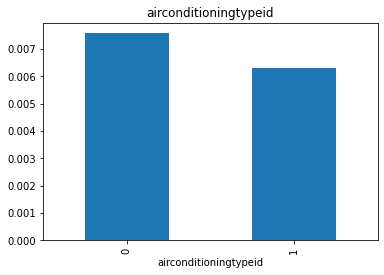

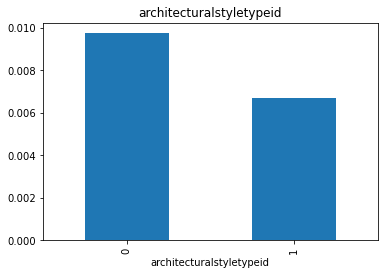

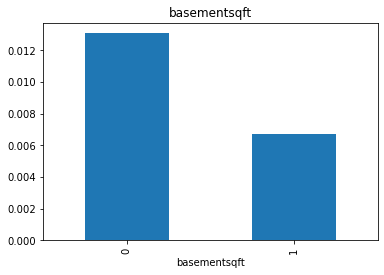

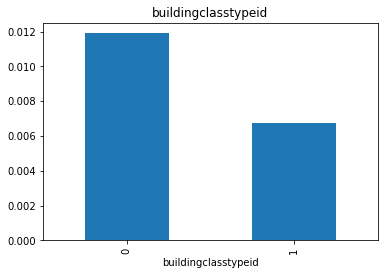

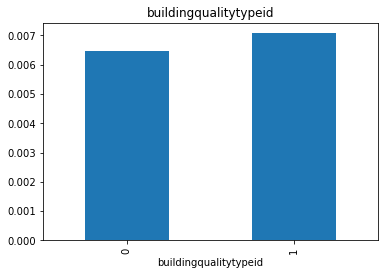

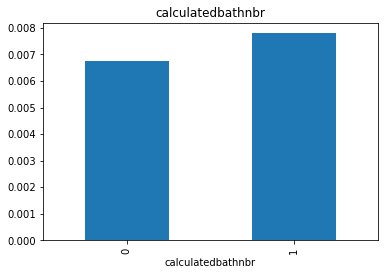

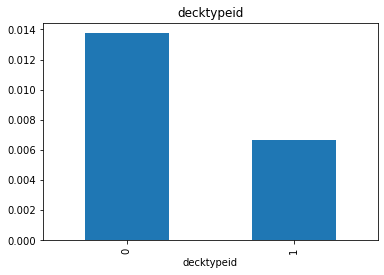

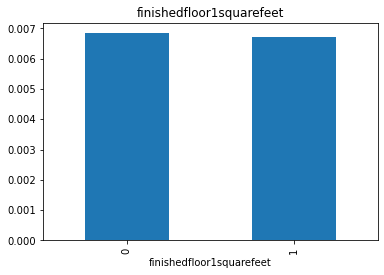

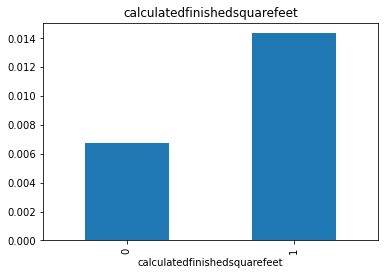

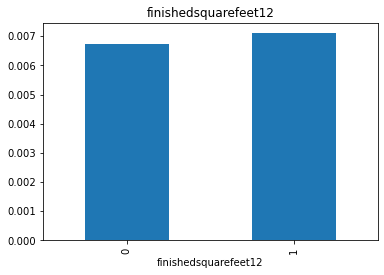

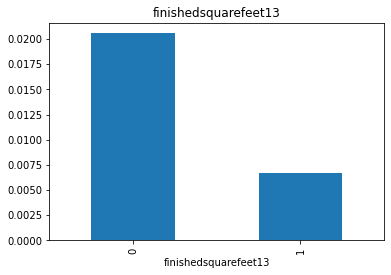

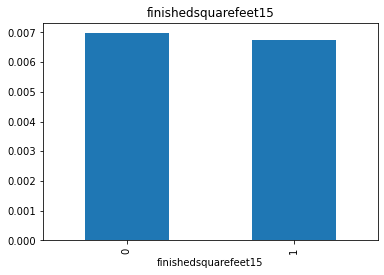

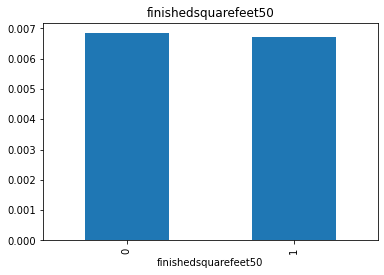

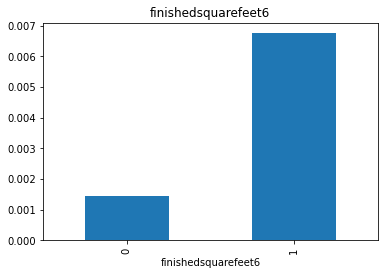

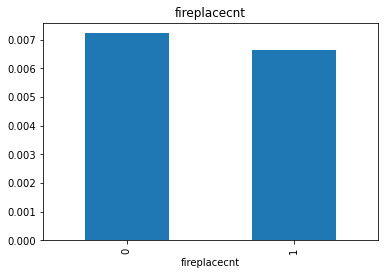

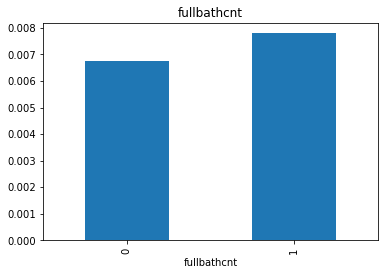

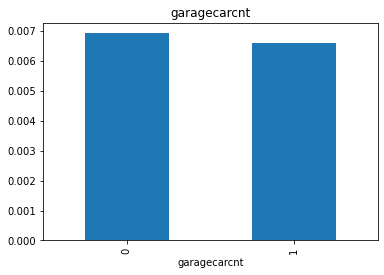

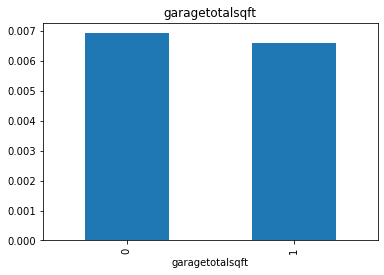

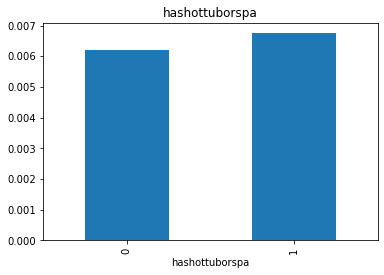

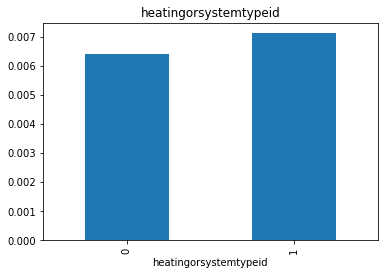

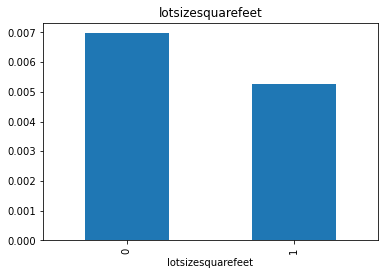

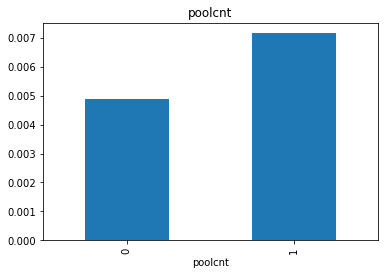

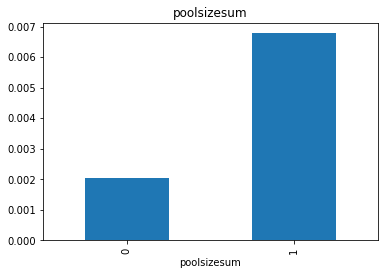

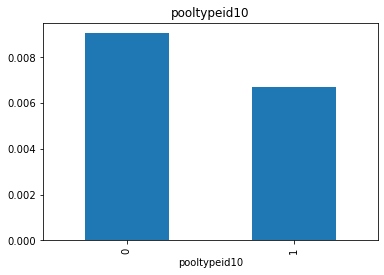

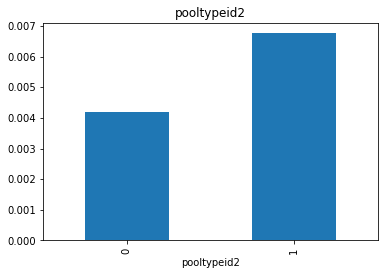

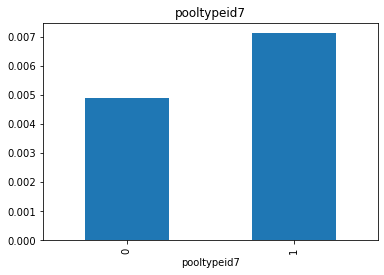

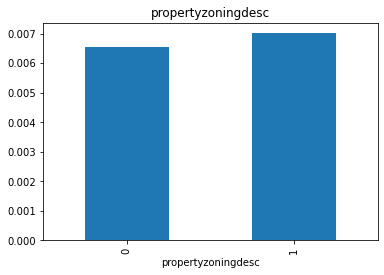

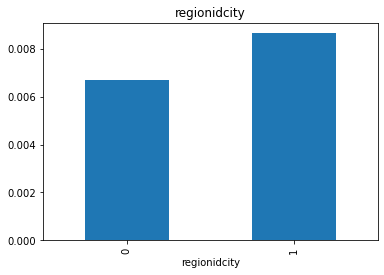

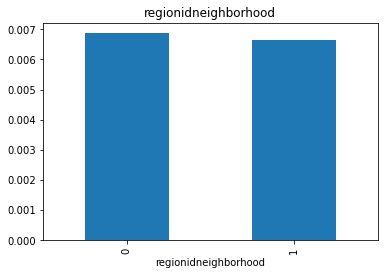

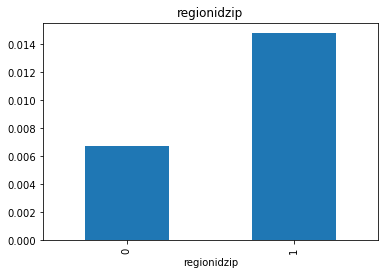

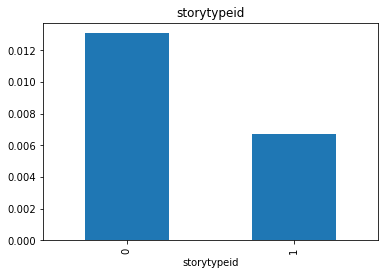

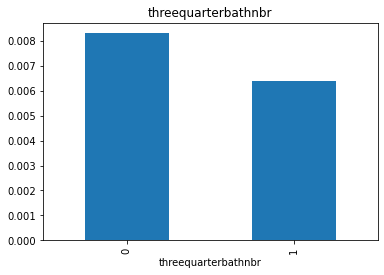

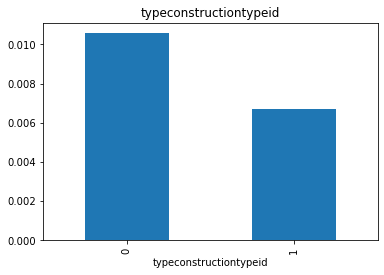

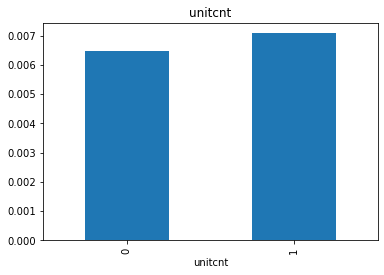

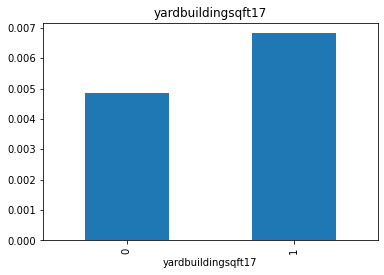

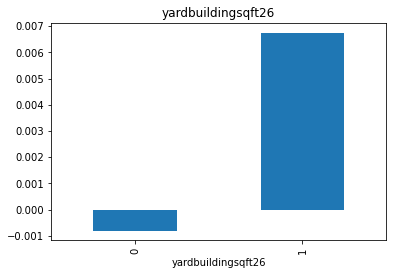

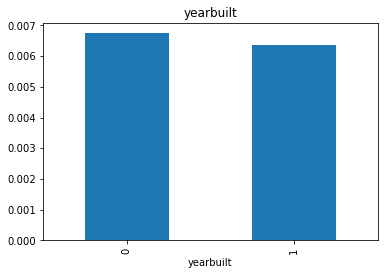

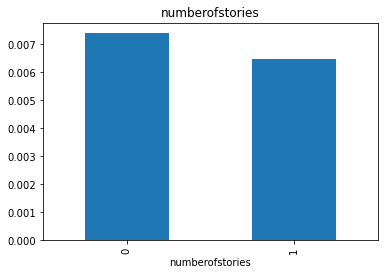

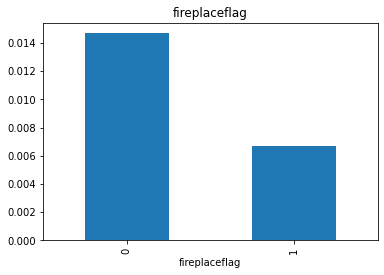

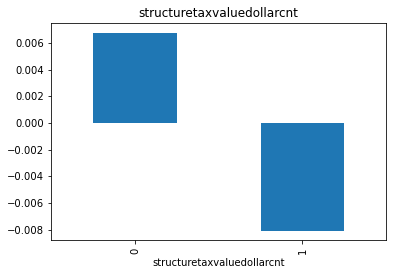

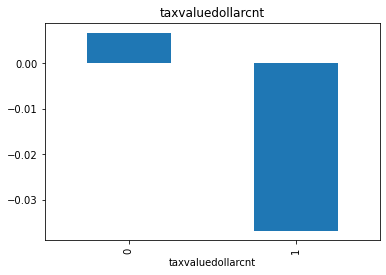

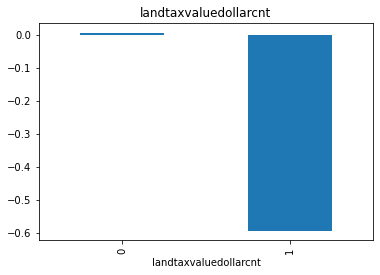

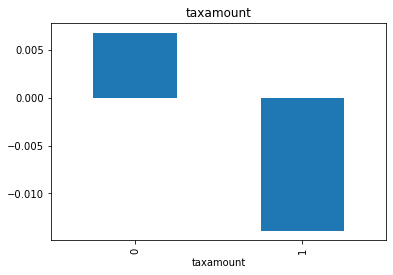

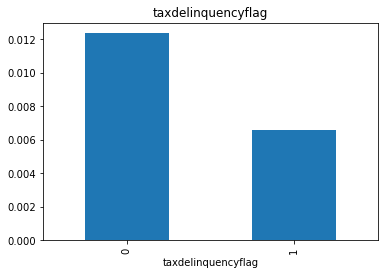

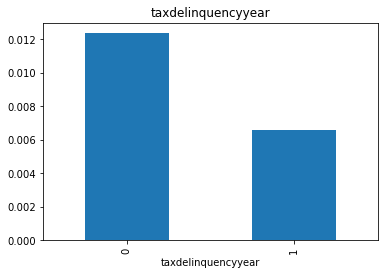

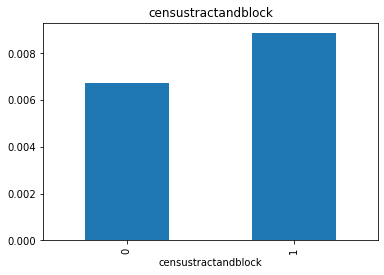

In [19]:
for var in mis_val:
    analyze_missing_values(houses_df_work, var)

In [21]:
print("Total nº of variables with some missing value in the dataset: ", len(mis_val))

Total nº of variables with some missing value in the dataset:  46


### 2.2 Distribution of the numerical and categorical variables and frequency distributions

##### First let's look at the rare variables

In [22]:
# Numerical variables using lambda as well
num_vars = [var for var in houses_df_work.columns if houses_df_work[var].dtypes!= 'O'] # Non-Object Variables
cat_vars = [var for var in houses_df_work.columns if houses_df_work[var].dtypes == 'O'] # Object Variables

print("Total no.of categorical variables in the dataset: ", len(cat_vars))
print("Total no.of numerical variables in the dataset: ", len(num_vars))

Total no.of categorical variables in the dataset:  6
Total no.of numerical variables in the dataset:  54


In [23]:
# Unique values for each categorical variables, and i wont use "loop for" to see numerical variables because the data amplitudes i would get a lot labels possibilities 
for var in cat_vars:
    print(var,'-->', len(houses_df_work[var].unique()), "values")

hashottuborspa --> 2 values
propertycountylandusecode --> 75 values
propertyzoningdesc --> 1908 values
fireplaceflag --> 2 values
taxdelinquencyflag --> 2 values
transactiondate --> 264 values


In [24]:
# Function to analyzing rarely occuring labels
def analyze_rare_labels(df, var, rare_percentage):
    new_df = df.copy()
    
    # determine the % of observations per category
    tmp = new_df.groupby(var)['logerror'].count() / len(new_df)
    
    # return categories that are rare
    return tmp[tmp < rare_percentage]

In [25]:
# print categories that are present in less than 1% of the observations
for var in cat_vars:
    #print(analyze_rare_labels(houses_df_work, var, 0.01))
    print(f'Rare categories: {analyze_rare_labels(houses_df_work, var, 0.01)}')

Rare categories: Series([], Name: logerror, dtype: float64)
Rare categories: propertycountylandusecode
0102    0.000039
0103    0.001176
0104    0.004743
0105    0.000039
0108    0.000737
          ...   
1720    0.000090
1722    0.000026
38      0.001215
73      0.000116
96      0.001176
Name: logerror, Length: 63, dtype: float64
Rare categories: propertyzoningdesc
1NR1*         0.000065
1NR3*         0.000039
AH RM-CD*     0.000065
AH RM-CD-F    0.000013
AH RS-(3)-    0.000013
                ...   
WVRPD40000    0.000013
WVRPD4OOOO    0.000103
WVRPD56*      0.000039
WVRR          0.000026
WVRR1-RPD1    0.000052
Name: logerror, Length: 1899, dtype: float64
Rare categories: fireplaceflag
True    0.002223
Name: logerror, dtype: float64
Rare categories: Series([], Name: logerror, dtype: float64)
Rare categories: transactiondate
2017-01-01    0.000103
2017-01-02    0.001241
2017-01-03    0.003864
2017-01-04    0.004122
2017-01-05    0.005105
                ...   
2017-09-18    0.002223


### 2.3 Distribution of Discrete variables

In this step i intend to identify the needs to scale and normalize the data

In [26]:
# Analysing the distribution of discrete variables using lambda again
discrete_vars = [var for var in num_vars if len(houses_df_work[var].unique()) < 20]

print('No.of discrete variables: ', len(discrete_vars))

No.of discrete variables:  26


In [28]:
discrete_vars

['airconditioningtypeid',
 'architecturalstyletypeid',
 'bedroomcnt',
 'buildingclasstypeid',
 'buildingqualitytypeid',
 'decktypeid',
 'finishedsquarefeet13',
 'fips',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'heatingorsystemtypeid',
 'poolcnt',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertylandusetypeid',
 'regionidcounty',
 'roomcnt',
 'storytypeid',
 'threequarterbathnbr',
 'typeconstructiontypeid',
 'unitcnt',
 'numberofstories',
 'assessmentyear',
 'taxdelinquencyyear']

In [27]:
# Check the results in dataframe
houses_df_work[discrete_vars].head()

,airconditioningtypeid,architecturalstyletypeid,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,decktypeid,finishedsquarefeet13,fips,fireplacecnt,fullbathcnt,garagecarcnt,heatingorsystemtypeid,poolcnt,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,regionidcounty,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,numberofstories,assessmentyear,taxdelinquencyyear
0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,6111.0,4.0,5.0,3.0,NaN,1.0,NaN,NaN,1.0,261.0,2061.0,11.0,NaN,NaN,NaN,NaN,2.0,2016.0,NaN
1,NaN,NaN,3.0,NaN,NaN,66.0,NaN,6111.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,261.0,2061.0,6.0,NaN,NaN,NaN,NaN,1.0,2016.0,NaN
2,NaN,NaN,3.0,NaN,NaN,66.0,NaN,6111.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,261.0,2061.0,6.0,NaN,1.0,NaN,NaN,1.0,2016.0,NaN
3,NaN,NaN,2.0,NaN,NaN,NaN,NaN,6111.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,266.0,2061.0,4.0,NaN,NaN,NaN,NaN,1.0,2016.0,NaN
4,NaN,NaN,2.0,NaN,NaN,NaN,NaN,6111.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,261.0,2061.0,5.0,NaN,NaN,NaN,NaN,1.0,2016.0,NaN


In [29]:
# Function to show the discrete variables distribution
def analyze_disc_vars(df,var):
    
    new_df = houses_df_work.copy()
    new_df[var].hist(bins=20)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title('Variation of '+ var)
    plt.show()

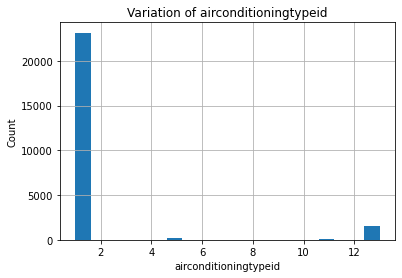

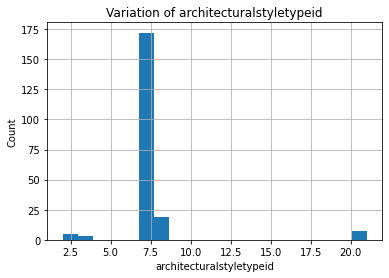

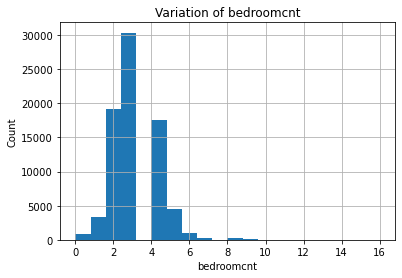

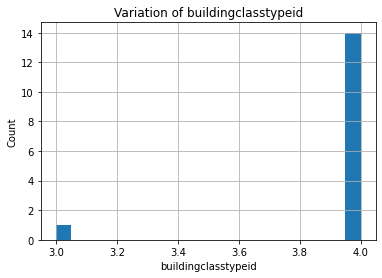

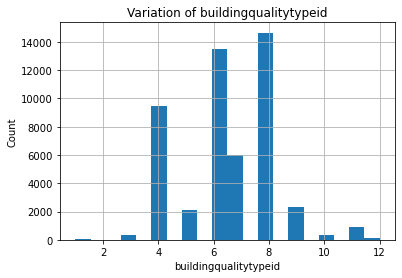

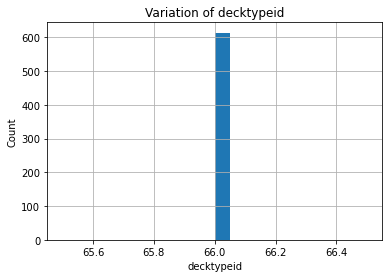

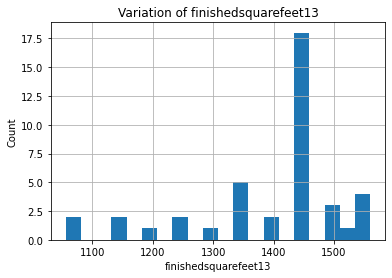

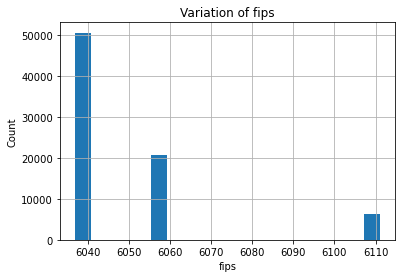

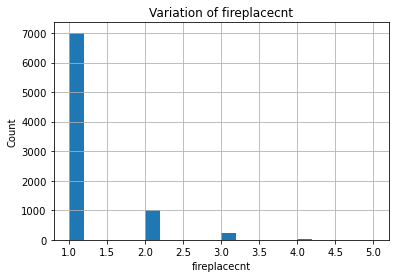

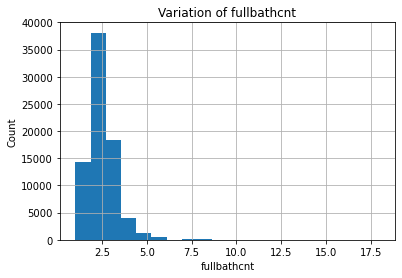

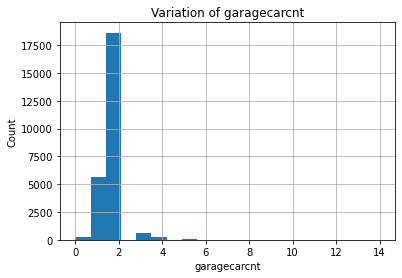

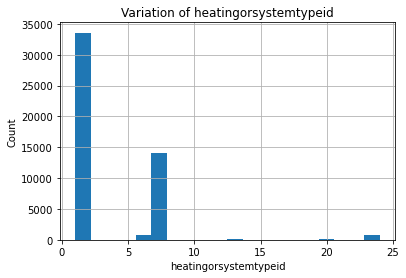

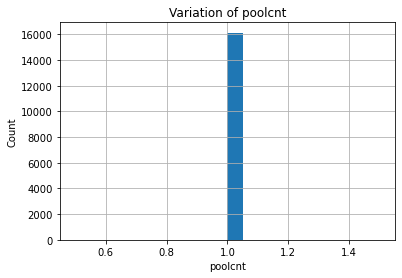

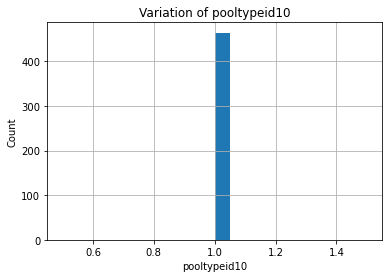

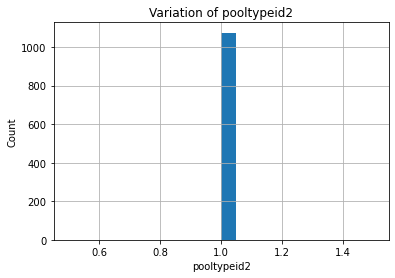

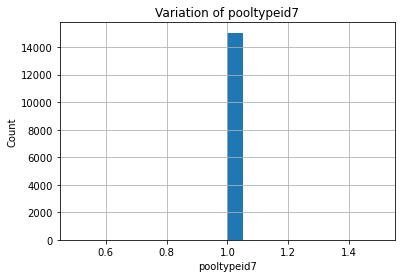

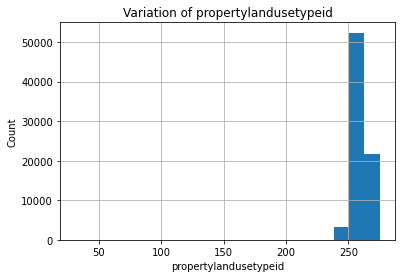

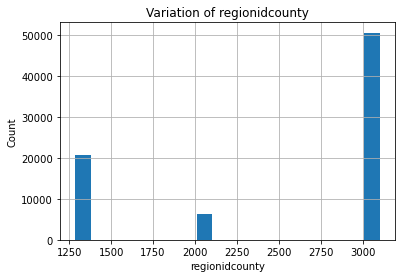

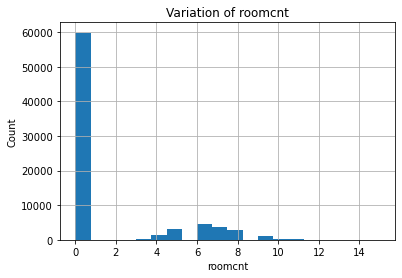

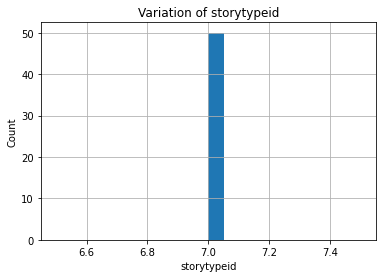

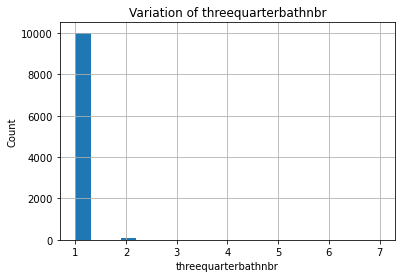

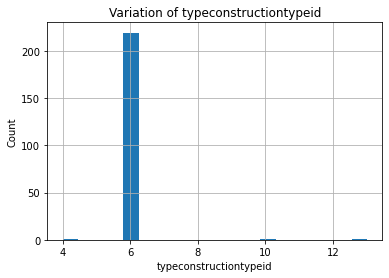

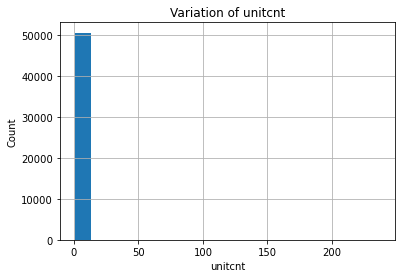

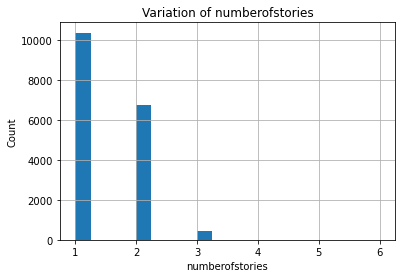

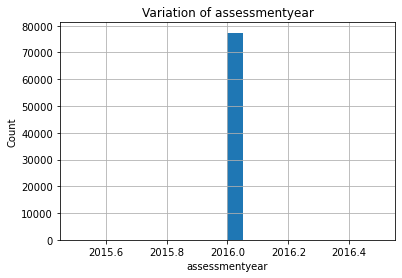

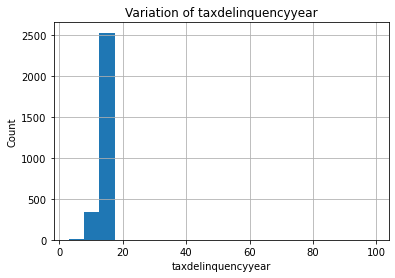

In [30]:
# Generate plots of discrete variables   
for var in discrete_vars:
    analyze_disc_vars(houses_df_work,var)

### 2.4 Distribution of Continuous variables

In [31]:
# The same technique applyed to the discrete variables
year_var = [var for var in num_vars if 'Yr' in var or 'year' in var ]
len(year_var), year_var

cont_vars = [var for var in num_vars if var not in discrete_vars and year_var]
print('No of continuous variables : ', len(cont_vars))

No of continuous variables :  28


In [32]:
# Function to show the continuous variables distribution
def analyze_cont_vars(df,var):
    
    new_df = houses_df_work.copy()
    new_df[var].hist(bins=20)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title('Variation of '+ var)
    plt.show()

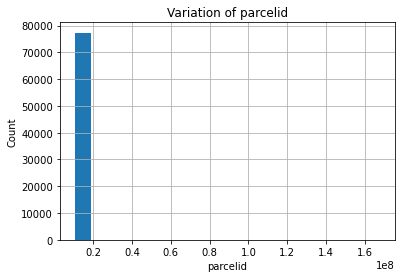

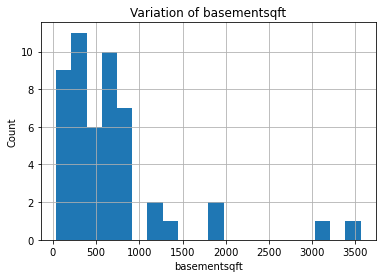

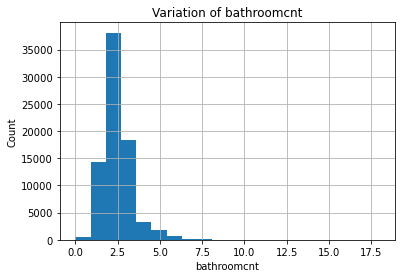

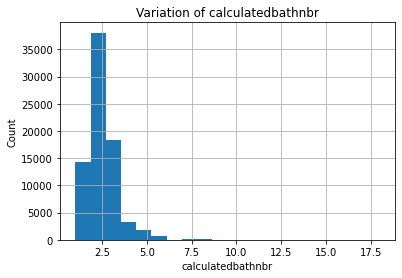

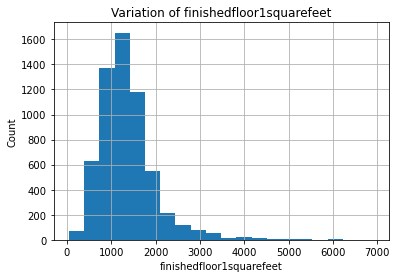

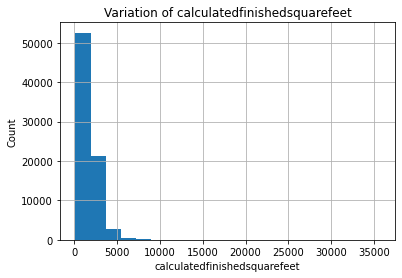

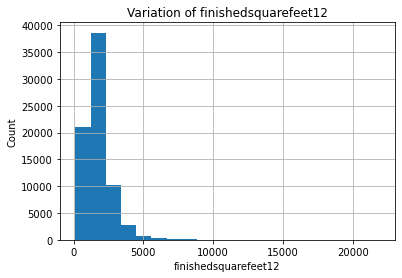

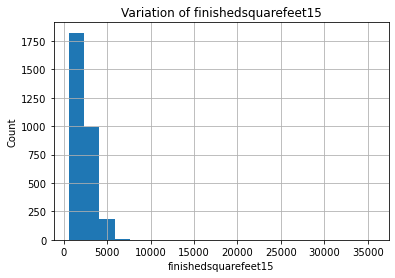

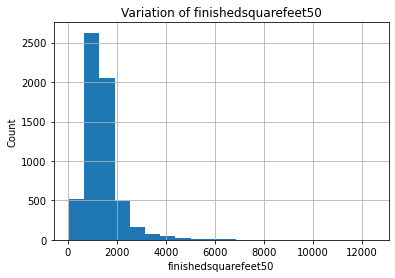

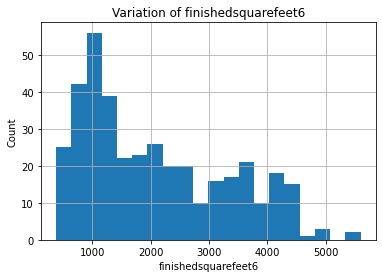

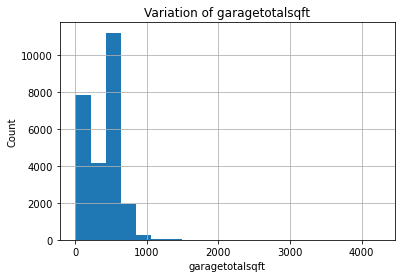

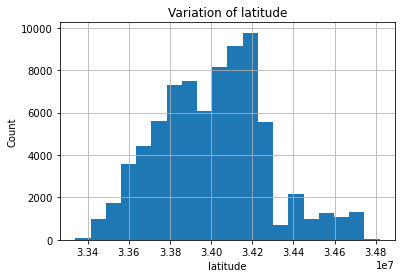

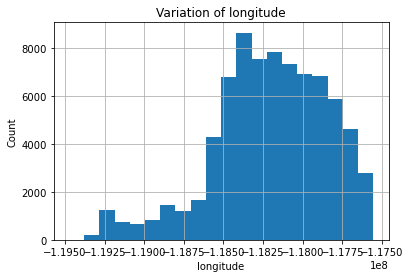

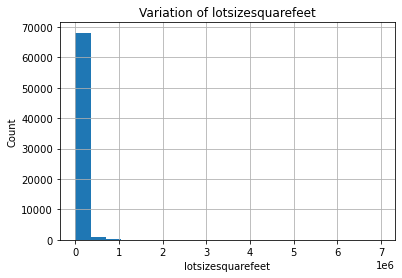

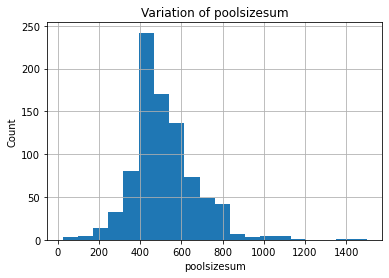

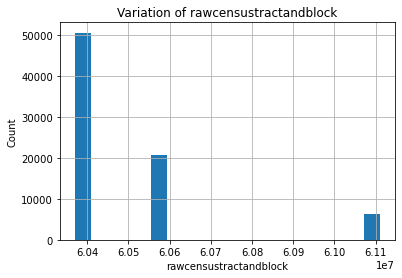

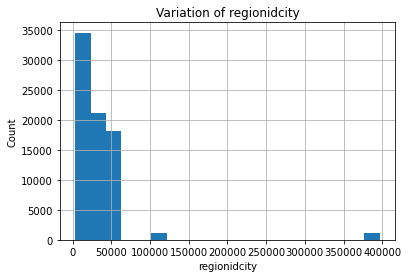

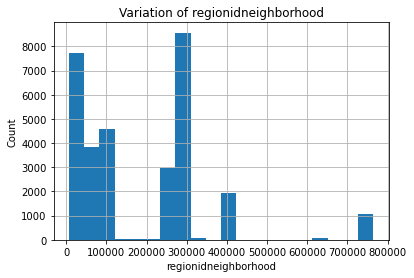

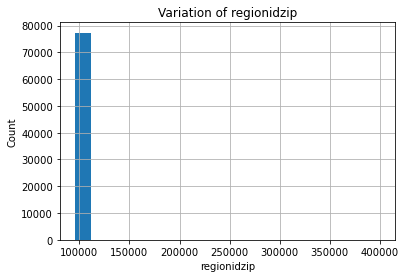

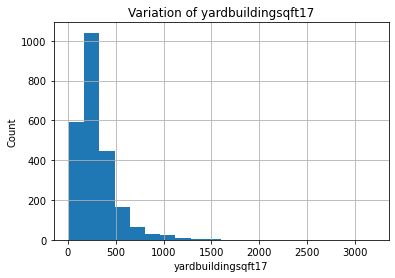

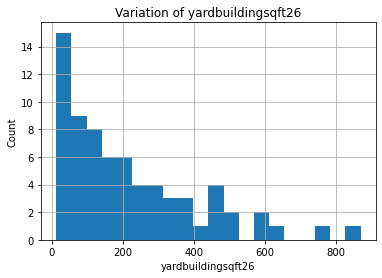

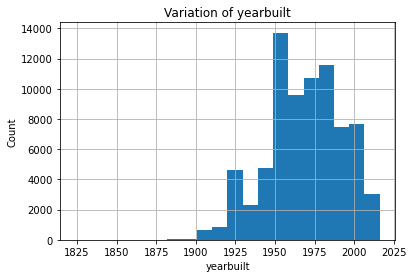

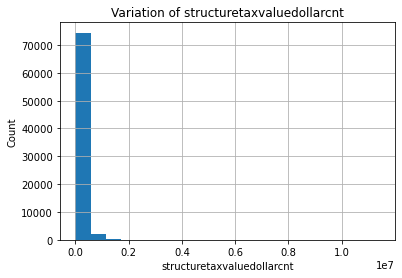

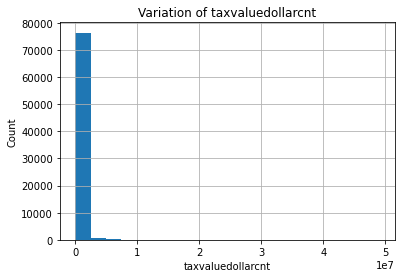

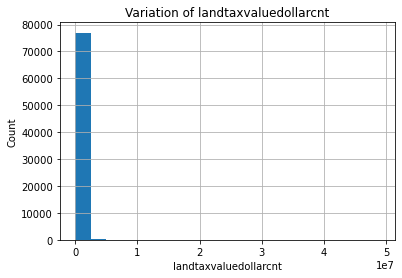

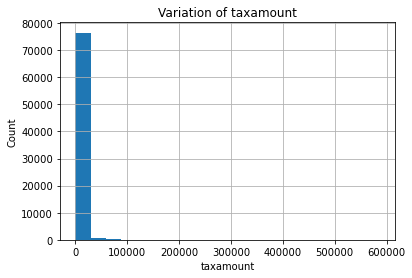

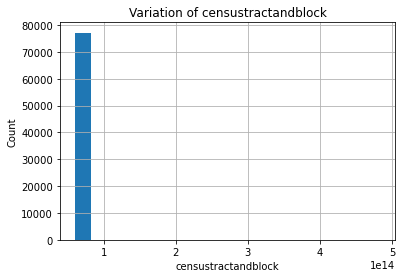

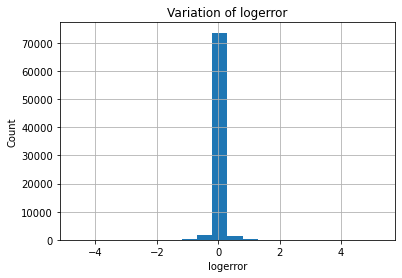

In [33]:
# Equal discrete generate plot to see the distribuition
for var in cont_vars:
    analyze_cont_vars(houses_df_work,var)

##### Conclusion about the distribuition
As demonstrade above, the distribuition of some variable are not normally, and as we know to apply linear regression techniques we need to try adjust the data more close as possible to the normal distribution, then in the next step i try to get better distribution with logarithm values otherwise the results of regression could get bias and inconsistencies accuracy

### 2.5 Adjusting distribuition with logarithmic values

In [34]:
# log Transformation of variables
def analyze_log_variation(df,var):
    
    new_df = df.copy()
    if 0 in new_df[var].unique():
        pass                 
    # Hence log(0) = undefined

    else:
        
        new_df[var] = np.log(new_df[var])
        new_df[var].hist(bins=20)
        plt.xlabel(var)
        plt.ylabel('Count')
        plt.title('Logarithmic Variation of '+ var)
        plt.show()

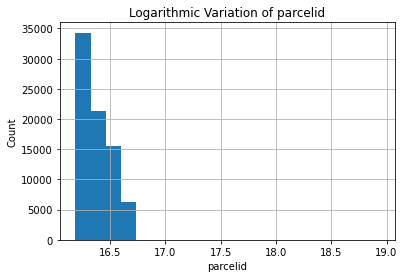

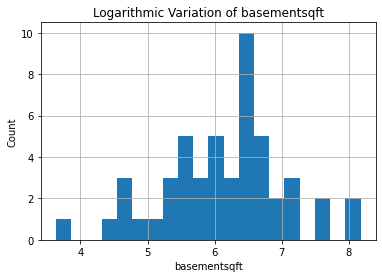

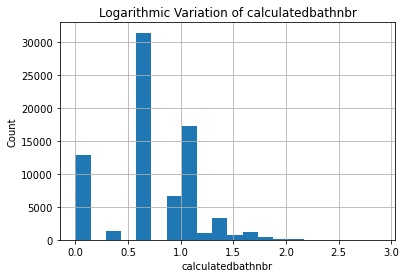

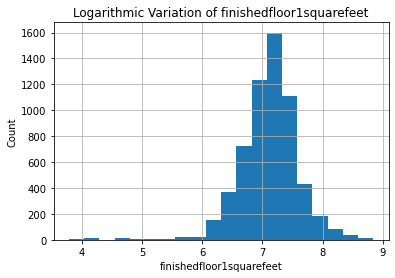

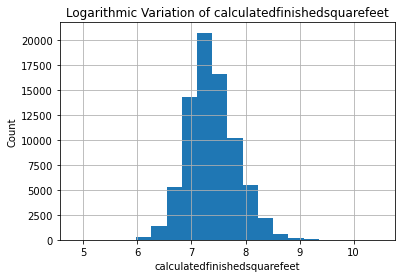

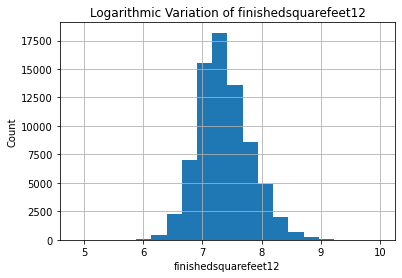

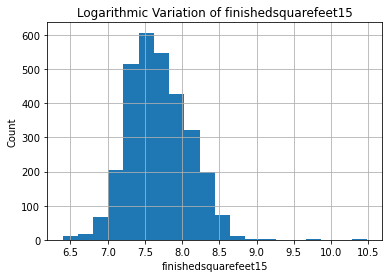

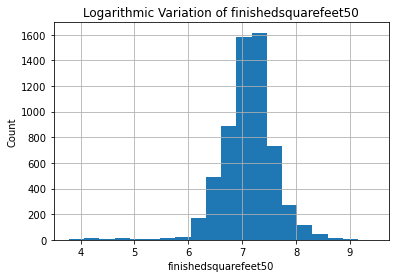

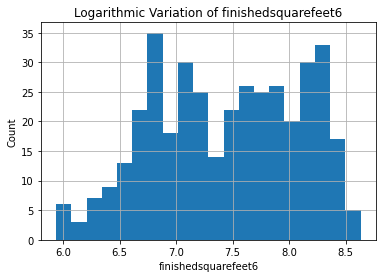

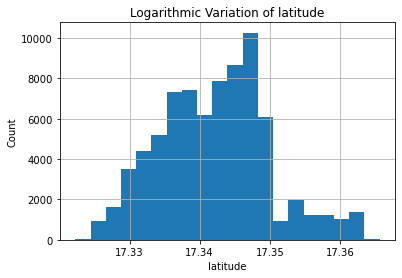

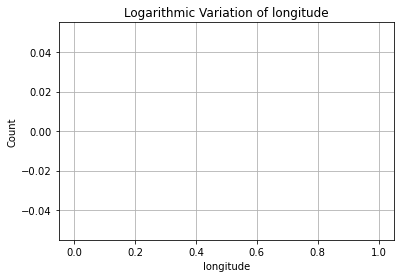

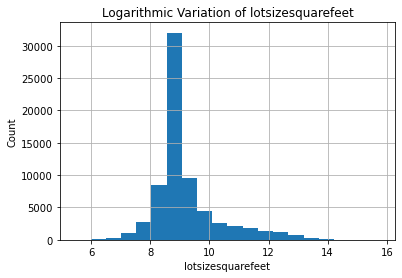

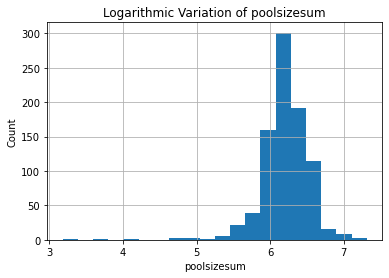

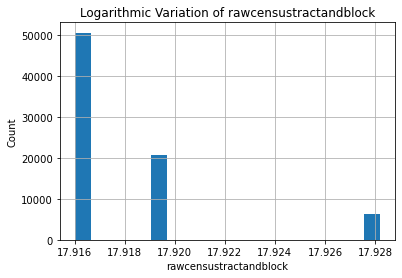

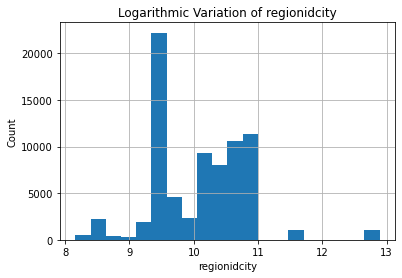

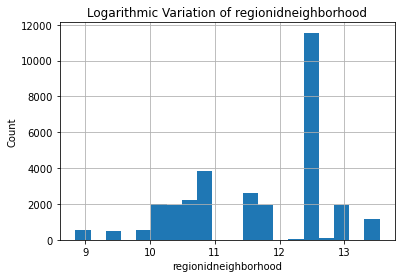

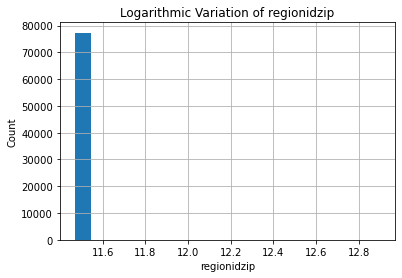

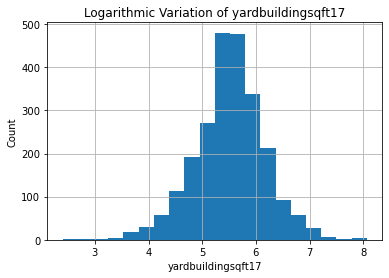

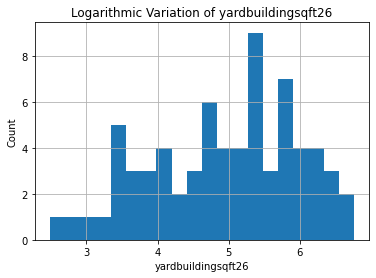

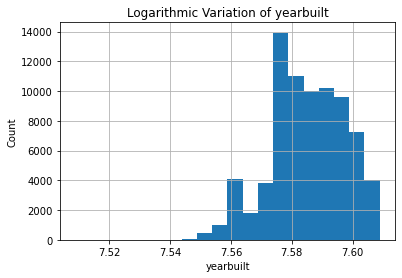

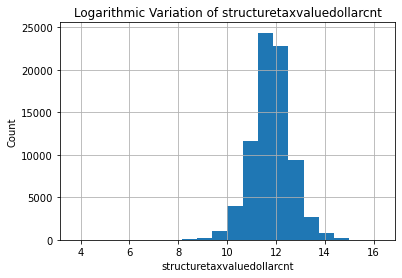

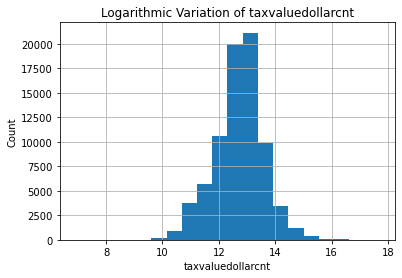

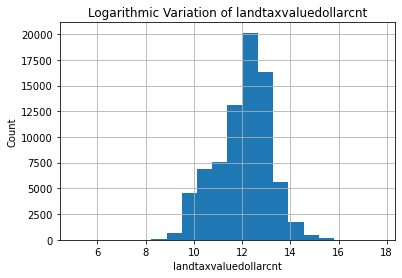

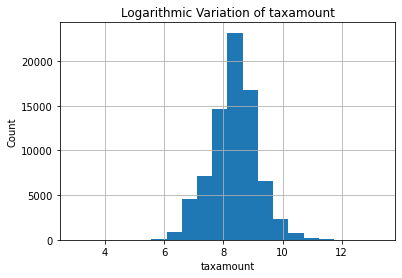

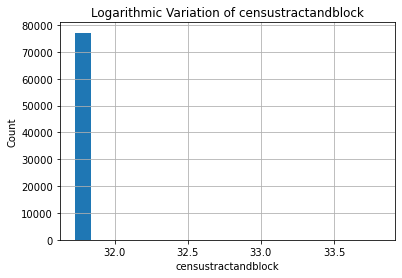

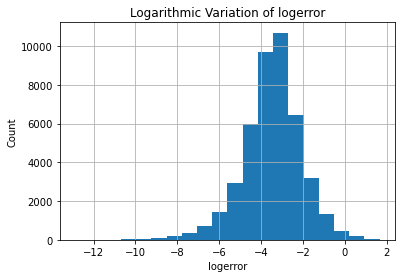

In [35]:
# Apply the logarithmic function
for var in cont_vars:
    analyze_log_variation(houses_df_work,var)

Compared with no logarithmic version it seems that the logarithmic version show us better distributions than no logarithmic version

### 2.6 Outliers

In [37]:
# Function to indenty and plot Outliers
def analyze_outliers(df,var):
    
    new_df = df.copy()
    
    if 0 in new_df[var].unique():
        pass
    
    else:
        new_df[var] = np.log(df[var])
        new_df.boxplot(column=var)
        plt.tight_layout()
        plt.show()

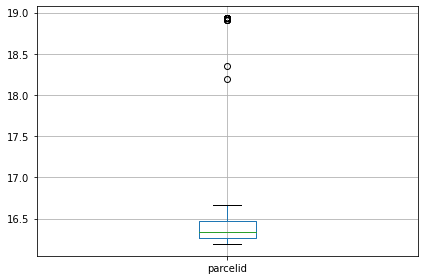

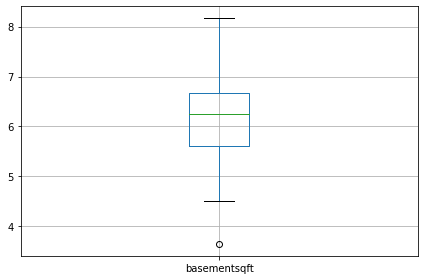

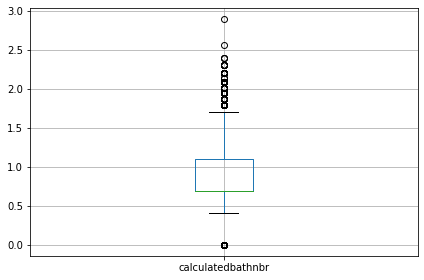

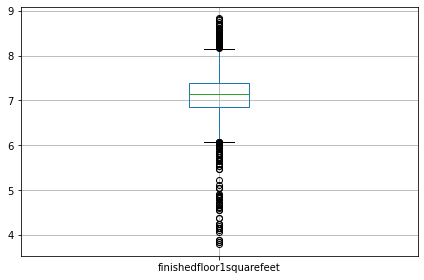

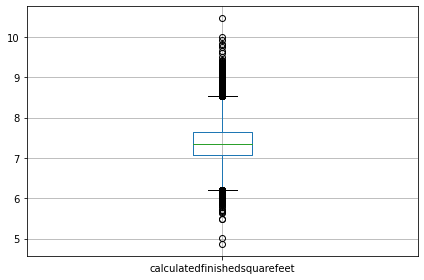

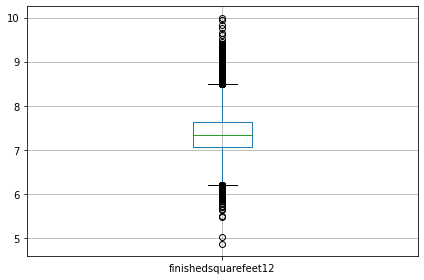

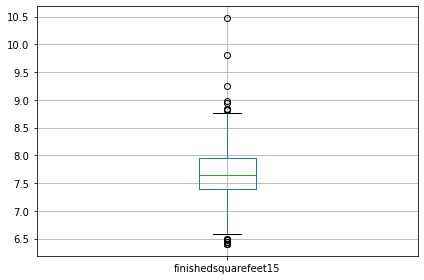

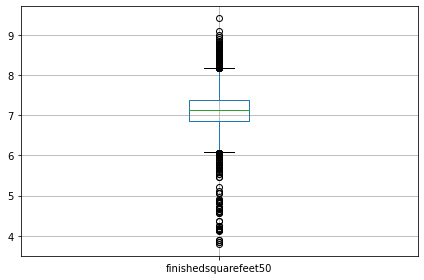

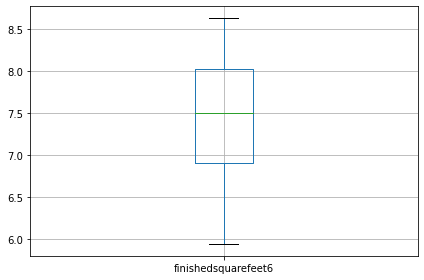

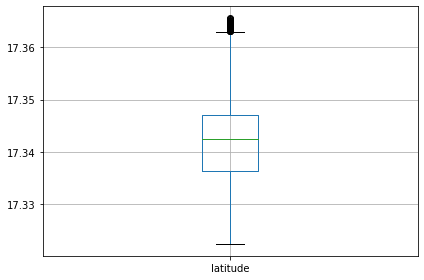

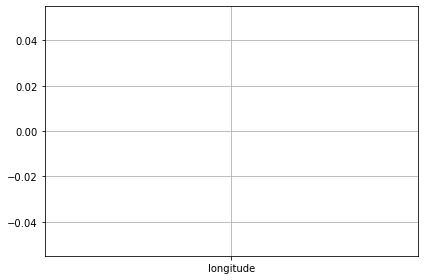

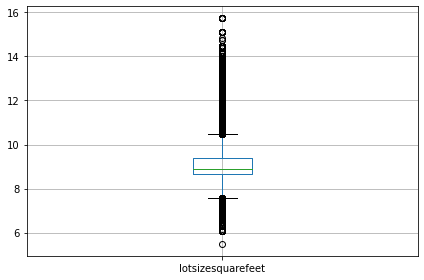

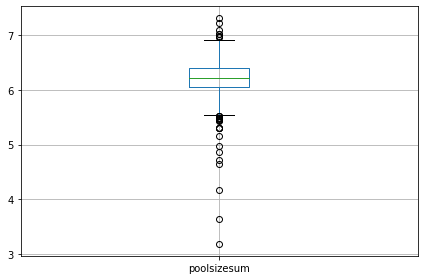

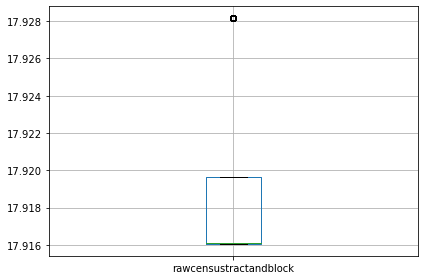

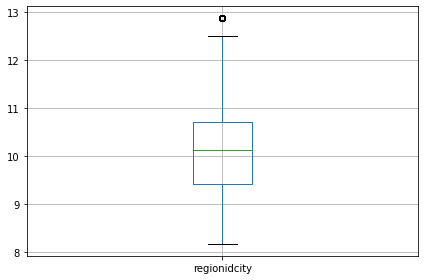

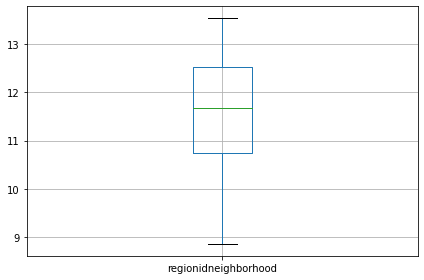

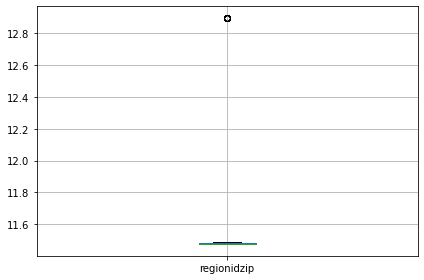

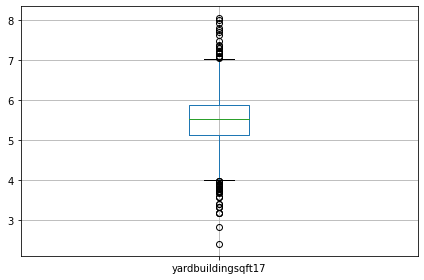

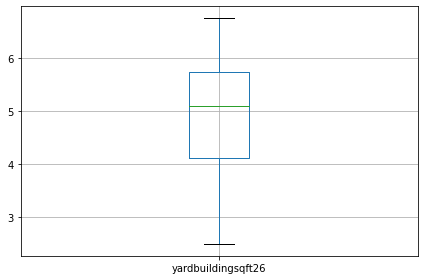

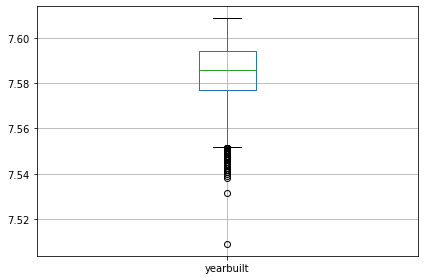

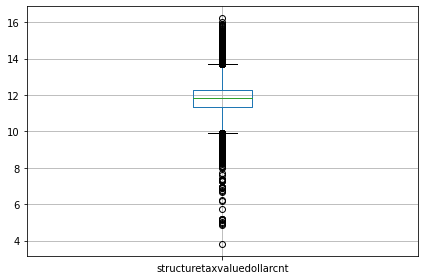

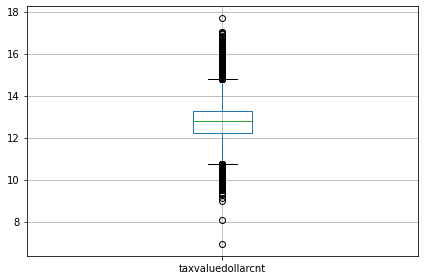

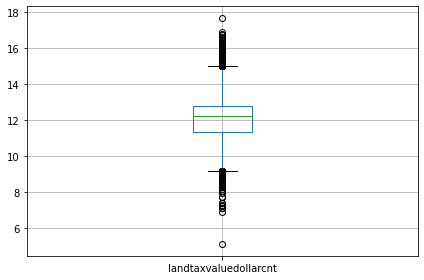

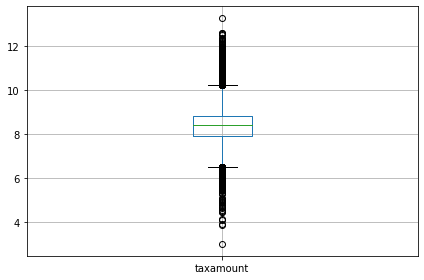

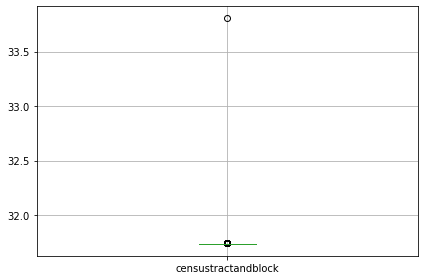

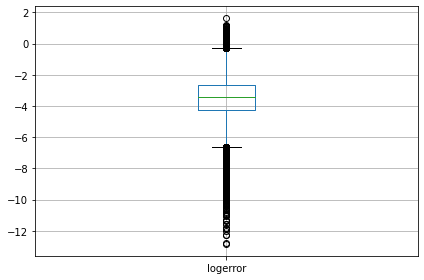

In [38]:
# Plotting it
for var in cont_vars:
    analyze_outliers(houses_df_work,var)
    print('\n')

We can see that there are outliers in some of the variables and we will remove those outliers with feature engineering and bulid a model on top of it

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'></span></b>Feature Engineering</b></p>
</div>

I will pre-process the variables of the Dataset and do feature engineering therefore we tackle following challenges:

* Duplicate check
* Columns Missing values
* Temporal variables
* Selective transformation of incorrectly scaled values
* Standarise the values of all variables to the same range (Standardization)
* Encoding of Categorical variables
* Forming new meaningful features if needed
* Dropping redundant columns
* Multi-Colinearity check and removal
* Outlier check and removal

##

#### Duplicate value removal

Duplicate Id check and removal

In [39]:
# Checking if there are duplicated values in the "parcelid" column
duplicate = houses_df_work[houses_df_work.duplicated('parcelid')]
print(f'Duplicates values: {duplicate.shape}')

Duplicates values: (0, 60)


Conclusion: No duplicates values from the same parcelid

#### Analysing columns missing values

In [40]:
# Double checking the missing values using the same techniquies used before
houses_df_work.isnull().mean()*100

parcelid                         0.000000
airconditioningtypeid           67.753066
architecturalstyletypeid        99.733785
basementsqft                    99.935385
bathroomcnt                      0.000000
bedroomcnt                       0.000000
buildingclasstypeid             99.980615
buildingqualitytypeid           35.808532
calculatedbathnbr                0.787015
decktypeid                      99.206524
finishedfloor1squarefeet        92.216436
calculatedfinishedsquarefeet     0.253292
finishedsquarefeet12             4.693659
finishedsquarefeet13            99.947015
finishedsquarefeet15            96.111449
finishedsquarefeet50            92.216436
finishedsquarefeet6             99.501170
fips                             0.000000
fireplacecnt                    89.304868
fullbathcnt                      0.787015
garagecarcnt                    67.079774
garagetotalsqft                 67.079774
hashottuborspa                  98.012432
heatingorsystemtypeid           36

Observation:

Above is evident that the data model has a lot missing values in multiple columns. In order to avoid creating synthetic data (for instance SMOTE method), i decided for columns which have more than 60% missing values drop those columns(>60% null values) and perform feature engineering on the rest of the data.

#### Dropping columns having more than 60% Missing values / Null values

In [41]:
# This variable as created in the begining of EDA and i've already stored the columns with 60% in this object
var_to_be_dropped

['airconditioningtypeid',
 'architecturalstyletypeid',
 'basementsqft',
 'buildingclasstypeid',
 'decktypeid',
 'finishedfloor1squarefeet',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fireplacecnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'regionidneighborhood',
 'storytypeid',
 'threequarterbathnbr',
 'typeconstructiontypeid',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'numberofstories',
 'fireplaceflag',
 'taxdelinquencyflag',
 'taxdelinquencyyear']

In [42]:
# I decide to keep the work versio in case i need to back to inicial version of dataset here i make one copy from original before to exclude missing values columns
houses_df_work_cleaned = houses_df_work.copy()

In [43]:
# Drop all columns with missing values (60%)
houses_df_work_cleaned.drop(columns=var_to_be_dropped, axis=1, inplace=True)

In [47]:
# Comparing two datasets after dropping the columns over 60% of missing values
print(f'Before exclusion: {houses_df_work.shape}')
print(f'After exclusion: {houses_df_work_cleaned.shape}')

Before exclusion: (77381, 60)
After exclusion: (77381, 31)


#### Temporal Variables

In this analysis, i noticed that the dataset has no house age and i think that it would be relevant to have this information once in many cases the house age could get a higher infuence in the final price, then i decide to create this variable calculating the difetence between the yearbuilt and current year (at the moment this study is happens)

In [48]:
# Creating one calculate column with all year difference
houses_df_work_cleaned['yeardifference'] = houses_df_work_cleaned['assessmentyear'] - houses_df_work_cleaned['yearbuilt']
houses_df_work_cleaned.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,yeardifference
0,17054981,5.0,4.0,NaN,5.0,3760.0,3760.0,6111.0,5.0,NaN,34449407.0,-119254052.0,42688.0,1110,261.0,NaN,6.111001e+07,13091.0,2061.0,97099.0,11.0,NaN,1982.0,501928.0,872850.0,2016.0,370922.0,9673.46,6.111001e+13,-0.013099,2017-06-15,34.0
1,17055743,2.0,3.0,NaN,2.0,1444.0,1444.0,6111.0,2.0,NaN,34454169.0,-119237898.0,7108.0,1110,261.0,NaN,6.111001e+07,13091.0,2061.0,97099.0,6.0,NaN,1951.0,130845.0,436157.0,2016.0,305312.0,5538.80,6.111001e+13,0.073985,2017-07-26,65.0
2,17068109,1.5,3.0,NaN,1.5,1698.0,1698.0,6111.0,1.0,NaN,34365693.0,-119448392.0,2588.0,1110,261.0,NaN,6.111001e+07,34543.0,2061.0,97081.0,6.0,NaN,1979.0,193413.0,286606.0,2016.0,93193.0,2987.36,6.111001e+13,0.071886,2017-07-28,37.0
3,17073952,2.0,2.0,NaN,2.0,986.0,986.0,6111.0,2.0,NaN,34305600.0,-119284000.0,NaN,1129,266.0,NaN,6.111002e+07,34543.0,2061.0,97081.0,4.0,NaN,1989.0,90357.0,258888.0,2016.0,168531.0,2706.24,6.111002e+13,0.305680,2017-06-02,27.0
4,17078502,1.0,2.0,NaN,1.0,1170.0,1170.0,6111.0,1.0,NaN,34278012.0,-119257047.0,5643.0,1110,261.0,NaN,6.111002e+07,34543.0,2061.0,97083.0,5.0,NaN,1948.0,148752.0,592930.0,2016.0,444178.0,6220.70,6.111002e+13,-0.073787,2017-07-07,68.0


In [49]:
# import the lib necessary to get the current date to become the age of the house dinamic
from datetime import datetime

data_atual = datetime.now()

In [50]:
# Creating the column with current date which will be necessary to calculate the diference between the yearbuilt and and current year
houses_df_work_cleaned['current_year'] = data_atual.year

In [51]:
# Implement the calculate to find the house age and create a new variable
houses_df_work_cleaned['house_age'] = houses_df_work_cleaned['current_year'] - houses_df_work_cleaned['yearbuilt']

In [52]:
# Check if is right
houses_df_work_cleaned.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,yeardifference,current_year,house_age
0,17054981,5.0,4.0,NaN,5.0,3760.0,3760.0,6111.0,5.0,NaN,34449407.0,-119254052.0,42688.0,1110,261.0,NaN,6.111001e+07,13091.0,2061.0,97099.0,11.0,NaN,1982.0,501928.0,872850.0,2016.0,370922.0,9673.46,6.111001e+13,-0.013099,2017-06-15,34.0,2024,42.0
1,17055743,2.0,3.0,NaN,2.0,1444.0,1444.0,6111.0,2.0,NaN,34454169.0,-119237898.0,7108.0,1110,261.0,NaN,6.111001e+07,13091.0,2061.0,97099.0,6.0,NaN,1951.0,130845.0,436157.0,2016.0,305312.0,5538.80,6.111001e+13,0.073985,2017-07-26,65.0,2024,73.0
2,17068109,1.5,3.0,NaN,1.5,1698.0,1698.0,6111.0,1.0,NaN,34365693.0,-119448392.0,2588.0,1110,261.0,NaN,6.111001e+07,34543.0,2061.0,97081.0,6.0,NaN,1979.0,193413.0,286606.0,2016.0,93193.0,2987.36,6.111001e+13,0.071886,2017-07-28,37.0,2024,45.0
3,17073952,2.0,2.0,NaN,2.0,986.0,986.0,6111.0,2.0,NaN,34305600.0,-119284000.0,NaN,1129,266.0,NaN,6.111002e+07,34543.0,2061.0,97081.0,4.0,NaN,1989.0,90357.0,258888.0,2016.0,168531.0,2706.24,6.111002e+13,0.305680,2017-06-02,27.0,2024,35.0
4,17078502,1.0,2.0,NaN,1.0,1170.0,1170.0,6111.0,1.0,NaN,34278012.0,-119257047.0,5643.0,1110,261.0,NaN,6.111002e+07,34543.0,2061.0,97083.0,5.0,NaN,1948.0,148752.0,592930.0,2016.0,444178.0,6220.70,6.111002e+13,-0.073787,2017-07-07,68.0,2024,76.0


Onde i have the new variable (house_age) i do not need the columns create to support this calculate then let's drop it

In [53]:
# Set the columns to drop
cols_to_drop = ['current_year']

In [54]:
# Dropping...
houses_df_work_cleaned.drop(columns=cols_to_drop, axis=1, inplace=True)

In [55]:
# Check the results
houses_df_work_cleaned.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,yeardifference,house_age
0,17054981,5.0,4.0,NaN,5.0,3760.0,3760.0,6111.0,5.0,NaN,34449407.0,-119254052.0,42688.0,1110,261.0,NaN,6.111001e+07,13091.0,2061.0,97099.0,11.0,NaN,1982.0,501928.0,872850.0,2016.0,370922.0,9673.46,6.111001e+13,-0.013099,2017-06-15,34.0,42.0
1,17055743,2.0,3.0,NaN,2.0,1444.0,1444.0,6111.0,2.0,NaN,34454169.0,-119237898.0,7108.0,1110,261.0,NaN,6.111001e+07,13091.0,2061.0,97099.0,6.0,NaN,1951.0,130845.0,436157.0,2016.0,305312.0,5538.80,6.111001e+13,0.073985,2017-07-26,65.0,73.0
2,17068109,1.5,3.0,NaN,1.5,1698.0,1698.0,6111.0,1.0,NaN,34365693.0,-119448392.0,2588.0,1110,261.0,NaN,6.111001e+07,34543.0,2061.0,97081.0,6.0,NaN,1979.0,193413.0,286606.0,2016.0,93193.0,2987.36,6.111001e+13,0.071886,2017-07-28,37.0,45.0
3,17073952,2.0,2.0,NaN,2.0,986.0,986.0,6111.0,2.0,NaN,34305600.0,-119284000.0,NaN,1129,266.0,NaN,6.111002e+07,34543.0,2061.0,97081.0,4.0,NaN,1989.0,90357.0,258888.0,2016.0,168531.0,2706.24,6.111002e+13,0.305680,2017-06-02,27.0,35.0
4,17078502,1.0,2.0,NaN,1.0,1170.0,1170.0,6111.0,1.0,NaN,34278012.0,-119257047.0,5643.0,1110,261.0,NaN,6.111002e+07,34543.0,2061.0,97083.0,5.0,NaN,1948.0,148752.0,592930.0,2016.0,444178.0,6220.70,6.111002e+13,-0.073787,2017-07-07,68.0,76.0


Now i have the dataset with the new variable let's move forward to the next step

#### Transform incorrectly scaled variables

1. As mentioned in the data dictionary, the latitude and longitude has been multiplied to 10^6.

2. I will perform a division of the same to scale it to original.

3. I will perform a similar operation for 'rawcensustractandblock'.

4. Also, I will perform a division of 10^12 for the 'censustractandblock' variable to bring it to original scale.

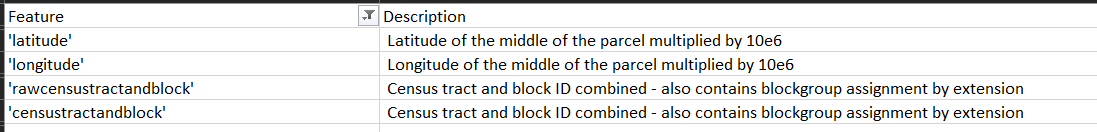

In [56]:
# Converting all variables in according to be align with data dicionary instructions
houses_df_work_cleaned[['latitude', 'longitude']] = (houses_df_work_cleaned[['latitude', 'longitude']])/(10**6)

houses_df_work_cleaned['censustractandblock'] = (houses_df_work_cleaned['censustractandblock'])/(10**12)

houses_df_work_cleaned['rawcensustractandblock'] = (houses_df_work_cleaned['rawcensustractandblock'])/(10**6)

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,yeardifference,house_age
0,17054981,5.0,4.0,NaN,5.0,3760.0,3760.0,6111.0,5.0,NaN,34.449407,-119.254052,42688.0,1110,261.0,NaN,61.110009,13091.0,2061.0,97099.0,11.0,NaN,1982.0,501928.0,872850.0,2016.0,370922.0,9673.46,61.110009,-0.013099,2017-06-15,34.0,42.0
1,17055743,2.0,3.0,NaN,2.0,1444.0,1444.0,6111.0,2.0,NaN,34.454169,-119.237898,7108.0,1110,261.0,NaN,61.110009,13091.0,2061.0,97099.0,6.0,NaN,1951.0,130845.0,436157.0,2016.0,305312.0,5538.80,61.110009,0.073985,2017-07-26,65.0,73.0
2,17068109,1.5,3.0,NaN,1.5,1698.0,1698.0,6111.0,1.0,NaN,34.365693,-119.448392,2588.0,1110,261.0,NaN,61.110012,34543.0,2061.0,97081.0,6.0,NaN,1979.0,193413.0,286606.0,2016.0,93193.0,2987.36,61.110012,0.071886,2017-07-28,37.0,45.0
3,17073952,2.0,2.0,NaN,2.0,986.0,986.0,6111.0,2.0,NaN,34.305600,-119.284000,NaN,1129,266.0,NaN,61.110022,34543.0,2061.0,97081.0,4.0,NaN,1989.0,90357.0,258888.0,2016.0,168531.0,2706.24,61.110022,0.305680,2017-06-02,27.0,35.0
4,17078502,1.0,2.0,NaN,1.0,1170.0,1170.0,6111.0,1.0,NaN,34.278012,-119.257047,5643.0,1110,261.0,NaN,61.110019,34543.0,2061.0,97083.0,5.0,NaN,1948.0,148752.0,592930.0,2016.0,444178.0,6220.70,61.110019,-0.073787,2017-07-07,68.0,76.0


In [57]:
# Checking the results
houses_df_work_cleaned[['latitude', 'longitude', 'censustractandblock', 'rawcensustractandblock']].head()

,latitude,longitude,censustractandblock,rawcensustractandblock
0,34.449407,-119.254052,61.110009,61.110009
1,34.454169,-119.237898,61.110009,61.110009
2,34.365693,-119.448392,61.110012,61.110012
3,34.305600,-119.284000,61.110022,61.110022
4,34.278012,-119.257047,61.110019,61.110019


#### Checking missing values after drop all columns above 60% of missing values

In [58]:
# Check the variables which still have missing values after the first exclusions
houses_df_work_cleaned.isnull().sum()

parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           27709
calculatedbathnbr                 609
calculatedfinishedsquarefeet      196
finishedsquarefeet12             3632
fips                                0
fullbathcnt                       609
heatingorsystemtypeid           27941
latitude                            0
longitude                           0
lotsizesquarefeet                8239
propertycountylandusecode           0
propertylandusetypeid               0
propertyzoningdesc              27050
rawcensustractandblock              0
regionidcity                     1471
regionidcounty                      0
regionidzip                        50
roomcnt                             0
unitcnt                         26818
yearbuilt                         263
structuretaxvaluedollarcnt        112
taxvaluedollarcnt                   1
assessmentyear                      0
landtaxvalue

After drop variables with more than 60% of their values missing i needed to handle with all variables with less than 60% of their values missing, then i decided to replace it with the mode value to get the reasonable distribution as well

In [59]:
# Replace missing values function
def replace_missing_data(df, mis_vars):
    print('##### Replacing missing values with mode of features #####')
    for var in mis_vars:
        df[var] = df[var].fillna(df[var].mode()[0])
    return df

In [60]:
# Apply function to replace missing values to mode
mis_var = [var for var in houses_df_work_cleaned.columns if houses_df_work_cleaned[var].isnull().sum() > 0]
houses_df_work_cleaned = replace_missing_data(houses_df_work_cleaned, mis_var)
houses_df_work_cleaned.head()

##### Replacing missing values with mode of features #####


,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,yeardifference,house_age
0,17054981,5.0,4.0,8.0,5.0,3760.0,3760.0,6111.0,5.0,2.0,34.449407,-119.254052,42688.0,1110,261.0,LAR1,61.110009,13091.0,2061.0,97099.0,11.0,1.0,1982.0,501928.0,872850.0,2016.0,370922.0,9673.46,61.110009,-0.013099,2017-06-15,34.0,42.0
1,17055743,2.0,3.0,8.0,2.0,1444.0,1444.0,6111.0,2.0,2.0,34.454169,-119.237898,7108.0,1110,261.0,LAR1,61.110009,13091.0,2061.0,97099.0,6.0,1.0,1951.0,130845.0,436157.0,2016.0,305312.0,5538.80,61.110009,0.073985,2017-07-26,65.0,73.0
2,17068109,1.5,3.0,8.0,1.5,1698.0,1698.0,6111.0,1.0,2.0,34.365693,-119.448392,2588.0,1110,261.0,LAR1,61.110012,34543.0,2061.0,97081.0,6.0,1.0,1979.0,193413.0,286606.0,2016.0,93193.0,2987.36,61.110012,0.071886,2017-07-28,37.0,45.0
3,17073952,2.0,2.0,8.0,2.0,986.0,986.0,6111.0,2.0,2.0,34.305600,-119.284000,6000.0,1129,266.0,LAR1,61.110022,34543.0,2061.0,97081.0,4.0,1.0,1989.0,90357.0,258888.0,2016.0,168531.0,2706.24,61.110022,0.305680,2017-06-02,27.0,35.0
4,17078502,1.0,2.0,8.0,1.0,1170.0,1170.0,6111.0,1.0,2.0,34.278012,-119.257047,5643.0,1110,261.0,LAR1,61.110019,34543.0,2061.0,97083.0,5.0,1.0,1948.0,148752.0,592930.0,2016.0,444178.0,6220.70,61.110019,-0.073787,2017-07-07,68.0,76.0


In [61]:
# Checking the results after replacement
houses_df_work_cleaned.isnull().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
heatingorsystemtypeid           0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
propertylandusetypeid           0
propertyzoningdesc              0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror      

After implement the replacement with mode as result there's no missing values

#### Encoding categorical variables (Transforming Categorical Variables to Numerical Variables)

In [62]:
# Before enconder i need to store what will be the variables to consider to implement the encoder in this case the categorical
cat_vars = [var for var in houses_df_work_cleaned.columns if houses_df_work_cleaned[var].dtypes == 'O']
cat_vars

['propertycountylandusecode', 'propertyzoningdesc', 'transactiondate']

In [63]:
# Creating the funct to encoder it
from sklearn.preprocessing import LabelEncoder

def encode_categorical_variables(df, cat_vars):
    
    print('Categorical variables: ', cat_vars)
    
    for i in range(len(cat_vars)):
        var = cat_vars[i]
        var_le = LabelEncoder()
        var_labels = var_le.fit_transform(df[var])
        var_mappings = {index: label for index, label in enumerate(var_le.classes_)}
        
        df[(var + '_labels')] = var_labels
        df.drop(columns=var, axis=1, inplace=True)
        
    return df

In [64]:
# Implement the funct to encoder
houses_df_work_cleaned = encode_categorical_variables(houses_df_work_cleaned, cat_vars)
houses_df_work_cleaned.head(10)

Categorical variables:  ['propertycountylandusecode', 'propertyzoningdesc', 'transactiondate']


,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,yeardifference,house_age,propertycountylandusecode_labels,propertyzoningdesc_labels,transactiondate_labels
0,17054981,5.0,4.0,8.0,5.0,3760.0,3760.0,6111.0,5.0,2.0,34.449407,-119.254052,42688.0,261.0,61.110009,13091.0,2061.0,97099.0,11.0,1.0,1982.0,501928.0,872850.0,2016.0,370922.0,9673.46,61.110009,-0.013099,34.0,42.0,51,580,165
1,17055743,2.0,3.0,8.0,2.0,1444.0,1444.0,6111.0,2.0,2.0,34.454169,-119.237898,7108.0,261.0,61.110009,13091.0,2061.0,97099.0,6.0,1.0,1951.0,130845.0,436157.0,2016.0,305312.0,5538.80,61.110009,0.073985,65.0,73.0,51,580,206
2,17068109,1.5,3.0,8.0,1.5,1698.0,1698.0,6111.0,1.0,2.0,34.365693,-119.448392,2588.0,261.0,61.110012,34543.0,2061.0,97081.0,6.0,1.0,1979.0,193413.0,286606.0,2016.0,93193.0,2987.36,61.110012,0.071886,37.0,45.0,51,580,208
3,17073952,2.0,2.0,8.0,2.0,986.0,986.0,6111.0,2.0,2.0,34.305600,-119.284000,6000.0,266.0,61.110022,34543.0,2061.0,97081.0,4.0,1.0,1989.0,90357.0,258888.0,2016.0,168531.0,2706.24,61.110022,0.305680,27.0,35.0,58,580,152
4,17078502,1.0,2.0,8.0,1.0,1170.0,1170.0,6111.0,1.0,2.0,34.278012,-119.257047,5643.0,261.0,61.110019,34543.0,2061.0,97083.0,5.0,1.0,1948.0,148752.0,592930.0,2016.0,444178.0,6220.70,61.110019,-0.073787,68.0,76.0,51,580,187
5,17079209,2.0,3.0,8.0,2.0,1257.0,1257.0,6111.0,2.0,2.0,34.273903,-119.273825,5000.0,261.0,61.110026,34543.0,2061.0,97081.0,5.0,1.0,1930.0,100900.0,462900.0,2016.0,362000.0,4861.56,61.110026,-0.011368,86.0,94.0,51,580,208
6,17085396,0.0,0.0,8.0,2.0,2832.0,2832.0,6111.0,2.0,2.0,34.258958,-119.261956,8555.0,246.0,61.110025,34543.0,2061.0,97081.0,0.0,2.0,1965.0,206363.0,454002.0,2016.0,247639.0,4848.06,61.110025,-0.005336,51.0,59.0,59,580,101
7,17086439,2.0,3.0,8.0,2.0,1441.0,1441.0,6111.0,2.0,2.0,34.280732,-119.222397,7944.0,261.0,61.110018,34543.0,2061.0,97083.0,6.0,1.0,1957.0,52253.0,69804.0,2016.0,17551.0,791.72,61.110018,-0.002042,59.0,67.0,52,580,29
8,17088994,1.0,2.0,8.0,1.0,777.0,777.0,6111.0,1.0,2.0,34.272866,-119.198911,6000.0,266.0,61.110015,34543.0,2061.0,97083.0,4.0,1.0,1990.0,146001.0,243332.0,2016.0,97331.0,2622.76,61.110015,0.016637,26.0,34.0,58,580,108
9,17091430,2.5,5.0,8.0,2.5,1718.0,1718.0,6111.0,2.0,2.0,34.275619,-119.177647,7275.0,261.0,61.110014,34543.0,2061.0,97084.0,7.0,1.0,1964.0,171642.0,286062.0,2016.0,114420.0,3037.60,61.110014,0.050096,52.0,60.0,52,580,249


#### Outliers analysis

I check out in some reference trying to understand what the best metodology to handle with the outliers, i found different approaches:

* Z-Score, the best metod to find outliers using standard deviation and mean to each data point, this metod works very well with normal distributions data sets.
* Isolation Forest Model, using decisions trees this metodoly take my attention because the references mentioned that this algorithm works well with non-normal distributions
* Interquatil interval using pandas lib with quantile metod, this metod is high recommended in normal distributions.

After this small research i could conclude that the Isolation Forest Model is a good fit with this present data model once it has not normal distributions as i mentioned in the EDA step

In [65]:
# Check how many variables are present after some preprocessing steps
houses_df_work_cleaned.shape

(77381, 33)

In [67]:
from sklearn.ensemble import IsolationForest

# Conveting to numpy array
houses_df_cleaned_no_outliers = np.array(houses_df_work_cleaned)

# Create the model and train it
model = IsolationForest(contamination=0.1)  # % of outliers waited
model.fit(houses_df_cleaned_no_outliers)

# Find outliers using a predict model
outliers = model.predict(houses_df_cleaned_no_outliers)

# Print how many outliers were found
num_outliers = np.sum(outliers == -1)
print("Outliers found in according the criteria defined before:", num_outliers)


Outliers found in according the criteria defined before: 7738


In [68]:
# Cleanning rows find above as outliers
houses_df_work_cleaned_no_outliers = houses_df_cleaned_no_outliers[outliers != -1]

In [70]:
# Checking the dataset without outliers
print(f'Dataframe with outliers: {houses_df_work_cleaned.shape}')
print(f'Dataframe without outliers {houses_df_work_cleaned_no_outliers.shape}')

Dataframe with outliers: (77381, 33)
Dataframe without outliers (69643, 33)


In [72]:
#Converting to data frame again
houses_df_work_cleaned_no_outliers = pd.DataFrame(houses_df_cleaned_no_outliers, columns=houses_df_work_cleaned.columns)

In [73]:
# Just checking if everything is still right
houses_df_work_cleaned_no_outliers.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,yeardifference,house_age,propertycountylandusecode_labels,propertyzoningdesc_labels,transactiondate_labels
0,17054981.0,5.0,4.0,8.0,5.0,3760.0,3760.0,6111.0,5.0,2.0,34.449407,-119.254052,42688.0,261.0,61.110009,13091.0,2061.0,97099.0,11.0,1.0,1982.0,501928.0,872850.0,2016.0,370922.0,9673.46,61.110009,-0.013099,34.0,42.0,51.0,580.0,165.0
1,17055743.0,2.0,3.0,8.0,2.0,1444.0,1444.0,6111.0,2.0,2.0,34.454169,-119.237898,7108.0,261.0,61.110009,13091.0,2061.0,97099.0,6.0,1.0,1951.0,130845.0,436157.0,2016.0,305312.0,5538.80,61.110009,0.073985,65.0,73.0,51.0,580.0,206.0
2,17068109.0,1.5,3.0,8.0,1.5,1698.0,1698.0,6111.0,1.0,2.0,34.365693,-119.448392,2588.0,261.0,61.110012,34543.0,2061.0,97081.0,6.0,1.0,1979.0,193413.0,286606.0,2016.0,93193.0,2987.36,61.110012,0.071886,37.0,45.0,51.0,580.0,208.0
3,17073952.0,2.0,2.0,8.0,2.0,986.0,986.0,6111.0,2.0,2.0,34.305600,-119.284000,6000.0,266.0,61.110022,34543.0,2061.0,97081.0,4.0,1.0,1989.0,90357.0,258888.0,2016.0,168531.0,2706.24,61.110022,0.305680,27.0,35.0,58.0,580.0,152.0
4,17078502.0,1.0,2.0,8.0,1.0,1170.0,1170.0,6111.0,1.0,2.0,34.278012,-119.257047,5643.0,261.0,61.110019,34543.0,2061.0,97083.0,5.0,1.0,1948.0,148752.0,592930.0,2016.0,444178.0,6220.70,61.110019,-0.073787,68.0,76.0,51.0,580.0,187.0


#### Correlation and Multi-Colinearity

The main idea in this step is ensure avoid multi colinearity identifing the highest correlation between the independents variables

In [74]:
# Store the data frame in one object to generate the correlation matrix
correlation_matrix = houses_df_work_cleaned_no_outliers.corr()

In [75]:
# Variance view
print(houses_df_work_cleaned_no_outliers.var().sort_values(ascending=False))

parcelid                            1.211977e+13
taxvaluedollarcnt                   4.269836e+11
landtaxvaluedollarcnt               2.426466e+11
structuretaxvaluedollarcnt          5.287513e+10
lotsizesquarefeet                   1.365449e+10
regionidcity                        2.191095e+09
taxamount                           5.810483e+07
regionidzip                         1.441846e+07
calculatedfinishedsquarefeet        9.087698e+05
finishedsquarefeet12                8.455082e+05
regionidcounty                      6.425519e+05
propertyzoningdesc_labels           1.509839e+05
transactiondate_labels              5.118144e+03
propertycountylandusecode_labels    7.485193e+02
yearbuilt                           5.644822e+02
house_age                           5.644822e+02
yeardifference                      5.644822e+02
fips                                4.304878e+02
propertylandusetypeid               2.643192e+01
heatingorsystemtypeid               9.098036e+00
roomcnt             

In [76]:
# Standard deviation
print(houses_df_work_cleaned_no_outliers.std().sort_values(ascending=False))  # Exibe o desvio padrão de cada variável

parcelid                            3.481346e+06
taxvaluedollarcnt                   6.534398e+05
landtaxvaluedollarcnt               4.925917e+05
structuretaxvaluedollarcnt          2.299459e+05
lotsizesquarefeet                   1.168524e+05
regionidcity                        4.680913e+04
taxamount                           7.622652e+03
regionidzip                         3.797165e+03
calculatedfinishedsquarefeet        9.532942e+02
finishedsquarefeet12                9.195152e+02
regionidcounty                      8.015934e+02
propertyzoningdesc_labels           3.885664e+02
transactiondate_labels              7.154121e+01
propertycountylandusecode_labels    2.735908e+01
yearbuilt                           2.375883e+01
house_age                           2.375883e+01
yeardifference                      2.375883e+01
fips                                2.074820e+01
propertylandusetypeid               5.141199e+00
heatingorsystemtypeid               3.016295e+00
roomcnt             

<AxesSubplot:>

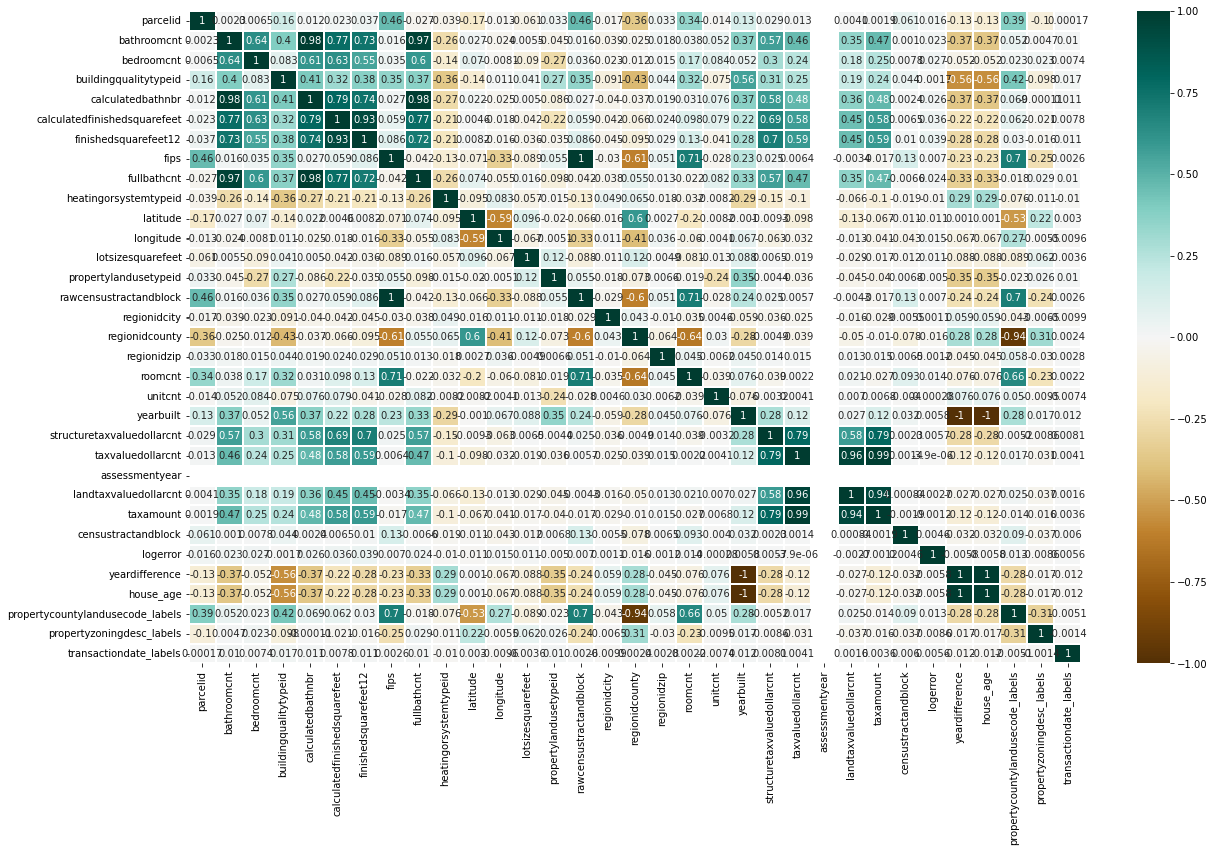

In [78]:
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True, cmap='BrBG', linewidths=0.4)

Conclusion:

To avaluate the multi-colinearity we should consider use the variance inflation for each independent variable, then to be able to handle with the multi-colinearity i will try to implement some method of variance inflation using stats or scikit-learn library for this issue.

I also decided to drop some variables which showed significant linear correlations such as: bathroomcnt and calculatedbathnbr and redundant variables such as yearbuilt

In [79]:
redundant_cols_to_drop = ['fullbathcnt', 'calculatedbathnbr', 'yearbuilt', 'regionidzip']
len(redundant_cols_to_drop)

4

In [80]:
# Drop redundant variables
houses_df_work_cleaned_no_outliers.drop(columns=redundant_cols_to_drop, axis=1, inplace=True)

#### Re-Examine Dataset and indeitfy redundant variables

In [81]:
# Initialize an empty list to store the names of duplicate columns
duplicate_cols = []

# Iterate through the columns to check for duplicates
for i in range(0, len(houses_df_work_cleaned_no_outliers.columns)):
    for j in range(i+1, len(houses_df_work_cleaned_no_outliers.columns)):
        # Check if the values in column i are identical to those in column j
        result = (houses_df_work_cleaned_no_outliers[houses_df_work_cleaned_no_outliers.columns[i]] == houses_df_work_cleaned_no_outliers[houses_df_work_cleaned_no_outliers.columns[j]])

        # If no differences are found, implying identical values, append column j to the duplicate_cols list
        if result[result == False].count() == 0:
            duplicate_cols.append(houses_df_work_cleaned_no_outliers.columns[j])

# Convert the duplicate_cols list to a set to remove duplicate entries
duplicate_cols = set(duplicate_cols)

print("Duplicate columns:", duplicate_cols)

Duplicate columns: set()


There's no duplicated columns, i decide check if i have any column with similar data, i considered the threshold of 80% of the values as similarity

In [83]:
# Identifying redundant columns
duplicate_cols = set()
cols_being_duplicated = set()
threshold = 80

# Iterate through pairs of columns to check for duplicates.
for i in range(len(houses_df_work_cleaned_no_outliers.columns)):
    col_a = houses_df_work_cleaned_no_outliers.columns[i]

    if col_a not in duplicate_cols:
        for j in range(i + 1, len(houses_df_work_cleaned_no_outliers.columns)):
            col_b = houses_df_work_cleaned_no_outliers.columns[j]

            if col_b not in duplicate_cols and (houses_df_work_cleaned_no_outliers[col_a] == houses_df_work_cleaned_no_outliers[col_b]).mean() * 100 >= threshold:
                print(f"Column {col_b} is at least {threshold}% equal to column {col_a}")
                duplicate_cols.add(col_b)
                cols_being_duplicated.add(col_a)

print("\nDuplicate columns:", duplicate_cols)

Column finishedsquarefeet12 is at least 80% equal to column calculatedfinishedsquarefeet

Duplicate columns: {'finishedsquarefeet12'}


In [84]:
# Drop columns indentifyed and stored in "Duplicate cols"
houses_df_work_cleaned_no_outliers.drop(columns=duplicate_cols, axis=1, inplace=True)

In [89]:
houses_df_work_cleaned_no_outliers.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,roomcnt,unitcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,yeardifference,house_age,propertycountylandusecode_labels,propertyzoningdesc_labels,transactiondate_labels
0,17054981.0,5.0,4.0,8.0,3760.0,6111.0,2.0,34.449407,-119.254052,42688.0,261.0,61.110009,13091.0,2061.0,11.0,1.0,501928.0,872850.0,2016.0,370922.0,9673.46,61.110009,-0.013099,34.0,42.0,51.0,580.0,165.0
1,17055743.0,2.0,3.0,8.0,1444.0,6111.0,2.0,34.454169,-119.237898,7108.0,261.0,61.110009,13091.0,2061.0,6.0,1.0,130845.0,436157.0,2016.0,305312.0,5538.80,61.110009,0.073985,65.0,73.0,51.0,580.0,206.0
2,17068109.0,1.5,3.0,8.0,1698.0,6111.0,2.0,34.365693,-119.448392,2588.0,261.0,61.110012,34543.0,2061.0,6.0,1.0,193413.0,286606.0,2016.0,93193.0,2987.36,61.110012,0.071886,37.0,45.0,51.0,580.0,208.0
3,17073952.0,2.0,2.0,8.0,986.0,6111.0,2.0,34.305600,-119.284000,6000.0,266.0,61.110022,34543.0,2061.0,4.0,1.0,90357.0,258888.0,2016.0,168531.0,2706.24,61.110022,0.305680,27.0,35.0,58.0,580.0,152.0
4,17078502.0,1.0,2.0,8.0,1170.0,6111.0,2.0,34.278012,-119.257047,5643.0,261.0,61.110019,34543.0,2061.0,5.0,1.0,148752.0,592930.0,2016.0,444178.0,6220.70,61.110019,-0.073787,68.0,76.0,51.0,580.0,187.0


After the preprocessing i noticed that the variable parceid could be removed once it is only the house identification number and it could get influency in regression calculation, so i decide remove it.

In [94]:
# Drop parcelid
# Correção: passar apenas o nome da coluna como uma string ou lista
houses_df_work_cleaned_no_outliers.drop(columns='parcelid', inplace=True)

In [95]:
# Store the final dataframe after preprocessing
final_houses_df = houses_df_work_cleaned_no_outliers

In [100]:
final_houses_df.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,roomcnt,unitcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,yeardifference,house_age,propertycountylandusecode_labels,propertyzoningdesc_labels,transactiondate_labels
0,5.0,4.0,8.0,3760.0,6111.0,2.0,34.449407,-119.254052,42688.0,261.0,61.110009,13091.0,2061.0,11.0,1.0,501928.0,872850.0,2016.0,370922.0,9673.46,61.110009,-0.013099,34.0,42.0,51.0,580.0,165.0
1,2.0,3.0,8.0,1444.0,6111.0,2.0,34.454169,-119.237898,7108.0,261.0,61.110009,13091.0,2061.0,6.0,1.0,130845.0,436157.0,2016.0,305312.0,5538.80,61.110009,0.073985,65.0,73.0,51.0,580.0,206.0
2,1.5,3.0,8.0,1698.0,6111.0,2.0,34.365693,-119.448392,2588.0,261.0,61.110012,34543.0,2061.0,6.0,1.0,193413.0,286606.0,2016.0,93193.0,2987.36,61.110012,0.071886,37.0,45.0,51.0,580.0,208.0
3,2.0,2.0,8.0,986.0,6111.0,2.0,34.305600,-119.284000,6000.0,266.0,61.110022,34543.0,2061.0,4.0,1.0,90357.0,258888.0,2016.0,168531.0,2706.24,61.110022,0.305680,27.0,35.0,58.0,580.0,152.0
4,1.0,2.0,8.0,1170.0,6111.0,2.0,34.278012,-119.257047,5643.0,261.0,61.110019,34543.0,2061.0,5.0,1.0,148752.0,592930.0,2016.0,444178.0,6220.70,61.110019,-0.073787,68.0,76.0,51.0,580.0,187.0


In [101]:
# Saving final Dataset
final_houses_df.to_csv('final_houses_df.csv', index=False)

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'></span></b>Model Building</b></p>
</div>

##

In [ ]:
#!pip install xgboost

In [98]:
import xgboost

from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

%matplotlib inline
pd.set_option('display.max_columns',None)
warnings.simplefilter(action='ignore')

In [115]:
# Import the preprocessed data
df = pd.read_csv('final_houses_df.csv')

In [116]:
# Checking it
df.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,roomcnt,unitcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,yeardifference,house_age,propertycountylandusecode_labels,propertyzoningdesc_labels,transactiondate_labels
0,5.0,4.0,8.0,3760.0,6111.0,2.0,34.449407,-119.254052,42688.0,261.0,61.110009,13091.0,2061.0,11.0,1.0,501928.0,872850.0,2016.0,370922.0,9673.46,61.110009,-0.013099,34.0,42.0,51.0,580.0,165.0
1,2.0,3.0,8.0,1444.0,6111.0,2.0,34.454169,-119.237898,7108.0,261.0,61.110009,13091.0,2061.0,6.0,1.0,130845.0,436157.0,2016.0,305312.0,5538.80,61.110009,0.073985,65.0,73.0,51.0,580.0,206.0
2,1.5,3.0,8.0,1698.0,6111.0,2.0,34.365693,-119.448392,2588.0,261.0,61.110012,34543.0,2061.0,6.0,1.0,193413.0,286606.0,2016.0,93193.0,2987.36,61.110012,0.071886,37.0,45.0,51.0,580.0,208.0
3,2.0,2.0,8.0,986.0,6111.0,2.0,34.305600,-119.284000,6000.0,266.0,61.110022,34543.0,2061.0,4.0,1.0,90357.0,258888.0,2016.0,168531.0,2706.24,61.110022,0.305680,27.0,35.0,58.0,580.0,152.0
4,1.0,2.0,8.0,1170.0,6111.0,2.0,34.278012,-119.257047,5643.0,261.0,61.110019,34543.0,2061.0,5.0,1.0,148752.0,592930.0,2016.0,444178.0,6220.70,61.110019,-0.073787,68.0,76.0,51.0,580.0,187.0


### Splitting the dataset into Train-Test sets

In [117]:
X = df.drop('logerror', axis=1)
y = df['logerror']

new_df = df.copy()

print(X.shape, y.shape)

(77381, 26) (77381,)


In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 23)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((58035, 26), (58035,), (19346, 26), (19346,))

### Feature Scaling

In [119]:
train_vars = [var for var in X_train.columns if var not in ['parcelid', 'logerror']]
len(train_vars)

26

In [120]:
scaler = StandardScaler()

scaler.fit(X_train[train_vars]) 

X_train[train_vars] = scaler.transform(X_train[train_vars])

X_test[train_vars] = scaler.transform(X_test[train_vars])

In [ ]:
X_train.head()

### Linear Regression Model

In [121]:
linear_reg = LinearRegression()

linear_reg.fit(X_train, y_train)

LinearRegression()

In [122]:
linear_reg_pred = linear_reg.predict(X_test)

print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, linear_reg_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, linear_reg_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, linear_reg_pred))))

Mean Absolute Error : 0.07045828289551866

Mean Squared Error : 0.029076848915520134

Root Mean Squared Error : 0.17051935056034004


In [123]:
import statsmodels.api as sm

X = X_train
y = y_train
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     9.381
Date:                Fri, 23 Feb 2024   Prob (F-statistic):           1.58e-34
Time:                        00:13:15   Log-Likelihood:                 21014.
No. Observations:               58035   AIC:                        -4.198e+04
Df Residuals:                   58010   BIC:                        -4.175e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.0164      0.001     23.434      0.000       0.015       0.018
bathroomcnt                         -0.0005      0.001     -0.362      0.717      -0.003       0.002
bedroomcnt                          -0.0005      0.001     -0.486      0.627      -0.003       0.002
buildingqualitytypeid               -0.0053      0.001     -5.038      0.000      -0.007      -0.003
calculatedfinishedsquarefeet         0.0125      0.001      8.706      0.000       0.010       0.015
fips                                -0.0855      0.086     -0.998      0.318      -0.253       0.082
heatingorsystemtypeid               -0.0015      0.001     -1.965      0.049      -0.003   -3.84e-06
latitude                            -0.0010      0.001     -0.888      0.375      -0.003       0.001
longitude                            0.0014      0.001      1.016      0.310      -0.001       0.004
lotsizesquarefeet                    0.0033      0.001      4.607      0.000       0.002       0.005
propertylandusetypeid                0.0016      0.001      1.718      0.086      -0.000       0.003
rawcensustractandblock               0.0863      0.085      1.012      0.311      -0.081       0.253
regionidcity                        -0.0003      0.001     -0.441      0.659      -0.002       0.001
regionidcounty                      -0.0058      0.003     -1.819      0.069      -0.012       0.000
roomcnt                              0.0008      0.001      0.706      0.480      -0.001       0.003
unitcnt                             -0.0009      0.001     -0.903      0.366      -0.003       0.001
structuretaxvaluedollarcnt          -0.0386      0.042     -0.924      0.356      -0.121       0.043
taxvaluedollarcnt                    0.1106      0.115      0.964      0.335      -0.114       0.336
assessmentyear                     -1.1e-15   1.18e-15     -0.931      0.352   -3.42e-15    1.22e-15
landtaxvaluedollarcnt               -0.0742      0.085     -0.877      0.380      -0.240       0.092
taxamount                           -0.0160      0.005     -3.147      0.002      -0.026      -0.006
censustractandblock                  0.0007      0.001      1.018      0.309      -0.001       0.002
yeardifference                      -0.0002      0.001     -0.390      0.696      -0.001       0.001
house_age                           -0.0002      0.001     -0.390      0.696      -0.001       0.001
propertycountylandusecode_labels    -0.0044      0.003     -1.420      0.155      -0.011       0.002
propertyzoningdesc_labels           -0.0010      0.001     -1.225      0.221      -0.003       0.001
transactiondate_labels               0.0010      0.001      1.488      0.137      -0.000       0.002
=====================================================

After run the model and check the stats such as P Value, i will return the excluded all variables with PValue > 0,05

In [124]:
# List of columns to be drop
cols_to_drop_model = [
'bedroomcnt'
, 'bathroomcnt'
, 'fips'
, 'latitude'
, 'longitude'
, 'rawcensustractandblock'
, 'regionidcity'
, 'roomcnt'
, 'unitcnt'
, 'structuretaxvaluedollarcnt'
, 'taxvaluedollarcnt'
, 'assessmentyear'
, 'landtaxvaluedollarcnt'
, 'censustractandblock'
, 'yeardifference'
#, 'house_age'
, 'propertycountylandusecode_labels'
, 'propertyzoningdesc_labels'
, 'transactiondate_labels']

df.drop(cols_to_drop_model, axis=1, inplace = True)

In [125]:
# Splitting it againg after dropping columns with high Pvalue
X = df.drop('logerror', axis=1)
y = df['logerror']

new_df = df.copy()

print(X.shape, y.shape)

(77381, 8) (77381,)


In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 23)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((58035, 8), (58035,), (19346, 8), (19346,))

In [127]:
# Training the model again
linear_reg.fit(X_train, y_train)

LinearRegression()

In [128]:
# Checking the results after drop variables
linear_reg_pred = linear_reg.predict(X_test)

print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, linear_reg_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, linear_reg_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, linear_reg_pred))))

Mean Absolute Error : 0.07039056162131775

Mean Squared Error : 0.02906797185503897

Root Mean Squared Error : 0.17049331909209514


In [163]:
X = X_train
y = y_train
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     25.38
Date:                Fri, 23 Feb 2024   Prob (F-statistic):           1.75e-39
Time:                        00:44:15   Log-Likelihood:                 21003.
No. Observations:               58035   AIC:                        -4.199e+04
Df Residuals:                   58026   BIC:                        -4.191e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.0863      0.041     -2.122      0.034      -0.166      -0.007
buildingqualitytypeid           -0.0035      0.001     -5.549      0.000      -0.005      -0.002
calculatedfinishedsquarefeet  1.203e-05      1e-06     12.036      0.000    1.01e-05     1.4e-05
heatingorsystemtypeid           -0.0005      0.000     -1.838      0.066      -0.001    3.11e-05
lotsizesquarefeet             2.584e-08   5.75e-09      4.498      0.000    1.46e-08    3.71e-08
propertylandusetypeid            0.0005      0.000      3.139      0.002       0.000       0.001
regionidcounty               -5.612e-06   9.98e-07     -5.625      0.000   -7.57e-06   -3.66e-06
taxamount                    -1.006e-06   1.16e-07     -8.679      0.000   -1.23e-06   -7.79e-07
house_age                     1.634e-05   3.76e-05      0.435      0.664   -5.74e-05       9e-05
==============================================================================
Omnibus:                    47016.086   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         27006858.845
Skew:                           2.768   Prob(JB):                         0.00
Kurtosis:                     108.536   Cond. No.                     7.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Conclusion with "regular linear regression:

After implement "the regular linear regression" considering all variables predefined after the EDA and preprocessing i can conclude that:

1. R2 close to zero indicates that the model cannot capture the variance of the target variable, which implies a low generalization and prediction capacity.

2. Limited performance of linear regression suggests that the data may have non-linear, complex relationships and interactions between variables that the linear model cannot capture. Data can benefit from more flexible models that can model these complexities. Therefore, it would be advisable to explore other more sophisticated models or advanced techniques, such as ensemble models, decision trees or gradient boosting-based machine learning algorithms, which could be able to capturing non-linear relationships and complex patterns in data.

If this first approach, i decide to implement others linear regression algorithms such as ElasticNet and Lasso Regression to try get better results

### Elastic Net

In [130]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) # L1 reguralization

elastic_net.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [131]:
elastic_net_pred = elastic_net.predict(X_test)

print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, elastic_net_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, elastic_net_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, elastic_net_pred))))

Mean Absolute Error : 0.07031535204217623

Mean Squared Error : 0.029090078998107442

Root Mean Squared Error : 0.17055813964190464


### Ridge Regression

In [132]:
ridge_reg = Ridge(alpha=1, solver='cholesky')

ridge_reg.fit(X_train, y_train)

Ridge(alpha=1, solver='cholesky')

In [133]:
ridge_reg_pred = ridge_reg.predict(X_test)

print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, ridge_reg_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, ridge_reg_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, ridge_reg_pred))))

Mean Absolute Error : 0.07039055862158075

Mean Squared Error : 0.029067971914866233

Root Mean Squared Error : 0.17049331926754852


### Lasso Regression Model

In [134]:
lasso_reg = Lasso(alpha=0.1)

lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [135]:
lasso_reg_pred = lasso_reg.predict(X_test)

print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, lasso_reg_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, lasso_reg_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, lasso_reg_pred))))

Mean Absolute Error : 0.0703094894179391

Mean Squared Error : 0.029089873913524918

Root Mean Squared Error : 0.17055753842479351


### XG Boost Regression Model

In [136]:
xgb_reg = xgboost.XGBRegressor()

xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [137]:
xgb_reg_pred = xgb_reg.predict(X_test)

print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, xgb_reg_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, xgb_reg_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, xgb_reg_pred))))

Mean Absolute Error : 0.07580784175594715

Mean Squared Error : 0.03095176735096772

Root Mean Squared Error : 0.1759311437778079


### Ada Boost Regression Model

In [138]:
adaboost_reg = AdaBoostRegressor()

adaboost_reg.fit(X_train, y_train)

AdaBoostRegressor()

In [139]:
adaboost_reg_pred = adaboost_reg.predict(X_test)

print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, adaboost_reg_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, adaboost_reg_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, adaboost_reg_pred))))

Mean Absolute Error : 0.10819939935365196

Mean Squared Error : 0.03949082894215916

Root Mean Squared Error : 0.19872299550419212


### Gradient Boosting Regression Model

In [140]:
gb_reg = GradientBoostingRegressor()

gb_reg.fit(X_train, y_train)

GradientBoostingRegressor()

In [141]:
gb_reg_pred = gb_reg.predict(X_test)

print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, gb_reg_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, gb_reg_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, gb_reg_pred))))

Mean Absolute Error : 0.07046417405438346

Mean Squared Error : 0.028994811274472187

Root Mean Squared Error : 0.17027862835503516


In [160]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [162]:
print('===== Linear Regression =====')
print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, linear_reg_pred)))
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, linear_reg_pred)))
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, linear_reg_pred))))
print('R2 : {}'.format(r2_score(y_test, linear_reg_pred)*100))
print()
print('===== Elastic Net =====')
print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, elastic_net_pred)))
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, elastic_net_pred)))
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, elastic_net_pred))))
print('R2 : {}'.format(r2_score(y_test, elastic_net_pred)*100))
print()
print('===== Ridge Regression =====')
print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, ridge_reg_pred)))
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, ridge_reg_pred)))
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, ridge_reg_pred))))
print('R2 : {}'.format(r2_score(y_test, ridge_reg_pred)*100))
print()
print('===== Lasso Regression =====')
print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, lasso_reg_pred)))
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, lasso_reg_pred)))
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, lasso_reg_pred))))
print('R2 : {}'.format(r2_score(y_test, lasso_reg_pred)*100))
print()
print('===== XG Boost Regression Model =====')
print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, xgb_reg_pred)))
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, xgb_reg_pred)))
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, xgb_reg_pred))))
print('R2 : {}'.format(r2_score(y_test, xgb_reg_pred)*100))
print()
print('===== Ada Boost =====')
print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, adaboost_reg_pred)))
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, adaboost_reg_pred)))
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, adaboost_reg_pred))))
print('R2 : {}'.format((r2_score(y_test, adaboost_reg_pred)*100)))
print()
print('===== Gradient Boost =====')
print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, gb_reg_pred)))
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, gb_reg_pred)))
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, gb_reg_pred))))
print('R2 : {}'.format((r2_score(y_test, gb_reg_pred)*100)))


===== Linear Regression =====
Mean Absolute Error : 0.07039056162131775
Mean Squared Error : 0.02906797185503897
Root Mean Squared Error : 0.17049331909209514
R2 : 0.11751587024343424

===== Elastic Net =====
Mean Absolute Error : 0.07031535204217623
Mean Squared Error : 0.029090078998107442
Root Mean Squared Error : 0.17055813964190464
R2 : 0.0415519750772253

===== Ridge Regression =====
Mean Absolute Error : 0.07039055862158075
Mean Squared Error : 0.029067971914866233
Root Mean Squared Error : 0.17049331926754852
R2 : 0.11751566466682295

===== Lasso Regression =====
Mean Absolute Error : 0.0703094894179391
Mean Squared Error : 0.029089873913524918
Root Mean Squared Error : 0.17055753842479351
R2 : 0.0422566805056368

===== XG Boost Regression Model =====
Mean Absolute Error : 0.07580784175594715
Mean Squared Error : 0.03095176735096772
Root Mean Squared Error : 0.1759311437778079
R2 : -6.355525133929429

===== Ada Boost =====
Mean Absolute Error : 0.10819939935365196
Mean Squared 

### Decision Tree Regressor

In [164]:
tree_reg = DecisionTreeRegressor(max_depth=5)

tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [166]:
tree_reg_pred = tree_reg.predict(X_test)

print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, tree_reg_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, tree_reg_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, tree_reg_pred))))
print()
print('R2 : {}'.format((r2_score(y_test, tree_reg_pred)*100)))

Mean Absolute Error : 0.07049564565721202

Mean Squared Error : 0.029467215766134803

Root Mean Squared Error : 0.17166017524788563

R2 : -1.254353959987542


### Random Forest Regression Model

In [167]:
forest_reg = RandomForestRegressor(n_estimators= 500, max_depth=6)

forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=500)

In [168]:
forest_reg_pred = forest_reg.predict(X_test)

print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, forest_reg_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, forest_reg_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, forest_reg_pred))))
print()
print('R2 : {}'.format((r2_score(y_test, forest_reg_pred)*100)))

Mean Absolute Error : 0.07031221817642543

Mean Squared Error : 0.029102723350353132

Root Mean Squared Error : 0.17059520318682214

R2 : -0.0018961649859816632


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'></span></b>Final conclusion</b></p>
</div>

The results suggest that, for this specific dataset, Gradient Boosting emerges as the most effective model, managing both to keep errors relatively low and provide the highest explanatory capability (R2) among the evaluated models. This reflects Gradient Boosting's ability to capture complexities in the data through sequentially fitting simple models to correct residual errors, resulting in more accurate predictions.

Conversely, both AdaBoost and XGBoost showed unsatisfactory performances, with XGBoost displaying an unexpected inefficiency, possibly due to the need for finer hyperparameter tuning or specific data characteristics that do not align well with the model's standard approach.

Ridge and Lasso regressions proved to be moderately effective, with Ridge offering a slight advantage in terms of explaining data variance. These results highlight the importance of model selection and hyperparameter tuning, especially given the specificities of the dataset in question.

In summary, while Gradient Boosting stands out as the most promising approach for this problem, further exploration in terms of model tuning and feature selection may reveal potential in other approaches, especially if efforts are made to optimize the performance of individually less performant models such as XGBoost and AdaBoost but i decide to move forward with the 2 more experimental approaches using Decision Tree and Random Forest but the results also did not increase in both algorithms.

In addiction, this results suggest that even Gradient Boosting show the best accurary between all of those algorithms the linear regression couldn't be the best approache to facing with this data struture, i also will try implement Cross Validation to ensure that there's no any linear approach able to increase the results.

##

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'></span></b>Cross Validation & Hyperparameter Optimization for Random Forest</b></p>
</div>

##

In [180]:
scores = cross_val_score(forest_reg, X_train, y_train, scoring="neg_mean_squared_error", cv = 5, n_jobs=2)

In [182]:
forest_reg_rmse_scores = np.sqrt(-scores)
forest_reg_rmse_scores

array([0.16464473, 0.17561863, 0.18275299, 0.1595707 , 0.1596619 ])

In [183]:
param_grid = [{
    'n_estimators': [100, 200],
    'max_features': [2, 3]
    },
    {'bootstrap': [False], 'n_estimators': [100, 200], 'max_features': [2, 3]}]

forest_regressor = RandomForestRegressor()

grid_search = GridSearchCV(forest_regressor, param_grid, scoring='neg_mean_squared_error',return_train_score=True,cv=3, n_jobs=1)

In [184]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid=[{'max_features': [2, 3], 'n_estimators': [100, 200]},
                         {'bootstrap': [False], 'max_features': [2, 3],
                          'n_estimators': [100, 200]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [185]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 200}

In [186]:
grid_search.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=200)

In [187]:
final_predictor = grid_search.best_estimator_
final_predictor.fit(X_train, y_train)
final_pred = final_predictor.predict(X_test)

In [188]:
print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, final_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, final_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, final_pred))))

Mean Absolute Error : 0.07641569856381697

Mean Squared Error : 0.03033918883055928

Root Mean Squared Error : 0.1741814824559697


Conclusion about Cross Validation

Evem after apply the cross validation try tunning the hiperparameters the resultas stay similar to the linear regression models trained previously don't increase the accuracy measure in any configuration.

### Feature importance

In [189]:
feature_importances = grid_search.best_estimator_.feature_importances_

attrs = list(df.select_dtypes(include = ['float64','int64']))

sorted(zip(attrs, feature_importances), reverse=True)

[('taxamount', 0.2973070479829335),
 ('regionidcounty', 0.00930672803908004),
 ('propertylandusetypeid', 0.017660492194054484),
 ('lotsizesquarefeet', 0.22566891787423787),
 ('logerror', 0.15346881796923087),
 ('heatingorsystemtypeid', 0.011988387503718511),
 ('calculatedfinishedsquarefeet', 0.25819235025134246),
 ('buildingqualitytypeid', 0.026407258185402363)]

### Summirazing the steps

1. I have performed all the feature engineering steps necessary to ensure the dataset is ready to be fed into Machine Learning algorithms. 

2. After Pre-processing and Feature Engineering the raw dataset we splitted the dataset into train and test sets.

3. Performed Feature scaling on data for better performance.

4. Trained multiple models using different ML regression algorithms on dataset.

5. Appleied Performance metrics such as MAE, MSE, RMSE to find out best prediction model.

6. With the help of GridSearch CV we found out best estimator with least Root mean squred error.